# Prediction of Healthy Bank 

## Callista Ivana Mogie
## 2402225420

In [245]:
# import necessary module/package

## dataset Manipulation Module/package
import pandas as pd
import numpy as np

## Graph module/package|
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm

## Model Creation module
from imblearn import under_sampling, over_sampling
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  
from sklearn import tree, svm
import graphviz 

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from ann_visualizer.visualize import ann_viz

## Evaluation Module 
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


# dataset Understanding

### 1. Import dataset and understand dataset

In [246]:
# Import and read dataset
# Get dataset shape
dataset = pd.read_csv("data.csv")
dataset.shape

# there is 6819 dataset with 96 attributes

(6819, 96)

In [247]:
dataset.tail(2)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6817                                           0.565302                   1   
6818                                           0.565167                   1   

       Equity to Liability  
6817              0.044009  
6818              0.233902  

[2 rows x 96 columns]

In [248]:
dataset.head(2)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   

    ROA(B) before interest and depreciation after tax  \
0                                            0.40575    
1                                            0.51673    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   

    Equity to Liability  
0              0.016469  
1              0.020794  

[2 rows x 96 columns]

In [249]:
# displaying the list of column names

list_of_column_names = list(dataset.columns)
print(list_of_column_names)

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth 

In [559]:
dataset.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

array([[<AxesSubplot: title={'center': 'Bankrupt?'}>,
        <AxesSubplot: title={'center': ' ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot: title={'center': ' ROA(A) before interest and % after tax'}>,
        <AxesSubplot: title={'center': ' ROA(B) before interest and depreciation after tax'}>,
        <AxesSubplot: title={'center': ' Operating Gross Margin'}>,
        <AxesSubplot: title={'center': ' Realized Sales Gross Margin'}>,
        <AxesSubplot: title={'center': ' Operating Profit Rate'}>,
        <AxesSubplot: title={'center': ' Pre-tax net Interest Rate'}>,
        <AxesSubplot: title={'center': ' After-tax net Interest Rate'}>,
        <AxesSubplot: title={'center': ' Non-industry income and expenditure/revenue'}>],
       [<AxesSubplot: title={'center': ' Continuous interest rate (after tax)'}>,
        <AxesSubplot: title={'center': ' Operating Expense Rate'}>,
        <AxesSubplot: title={'center': ' Research and development expense 

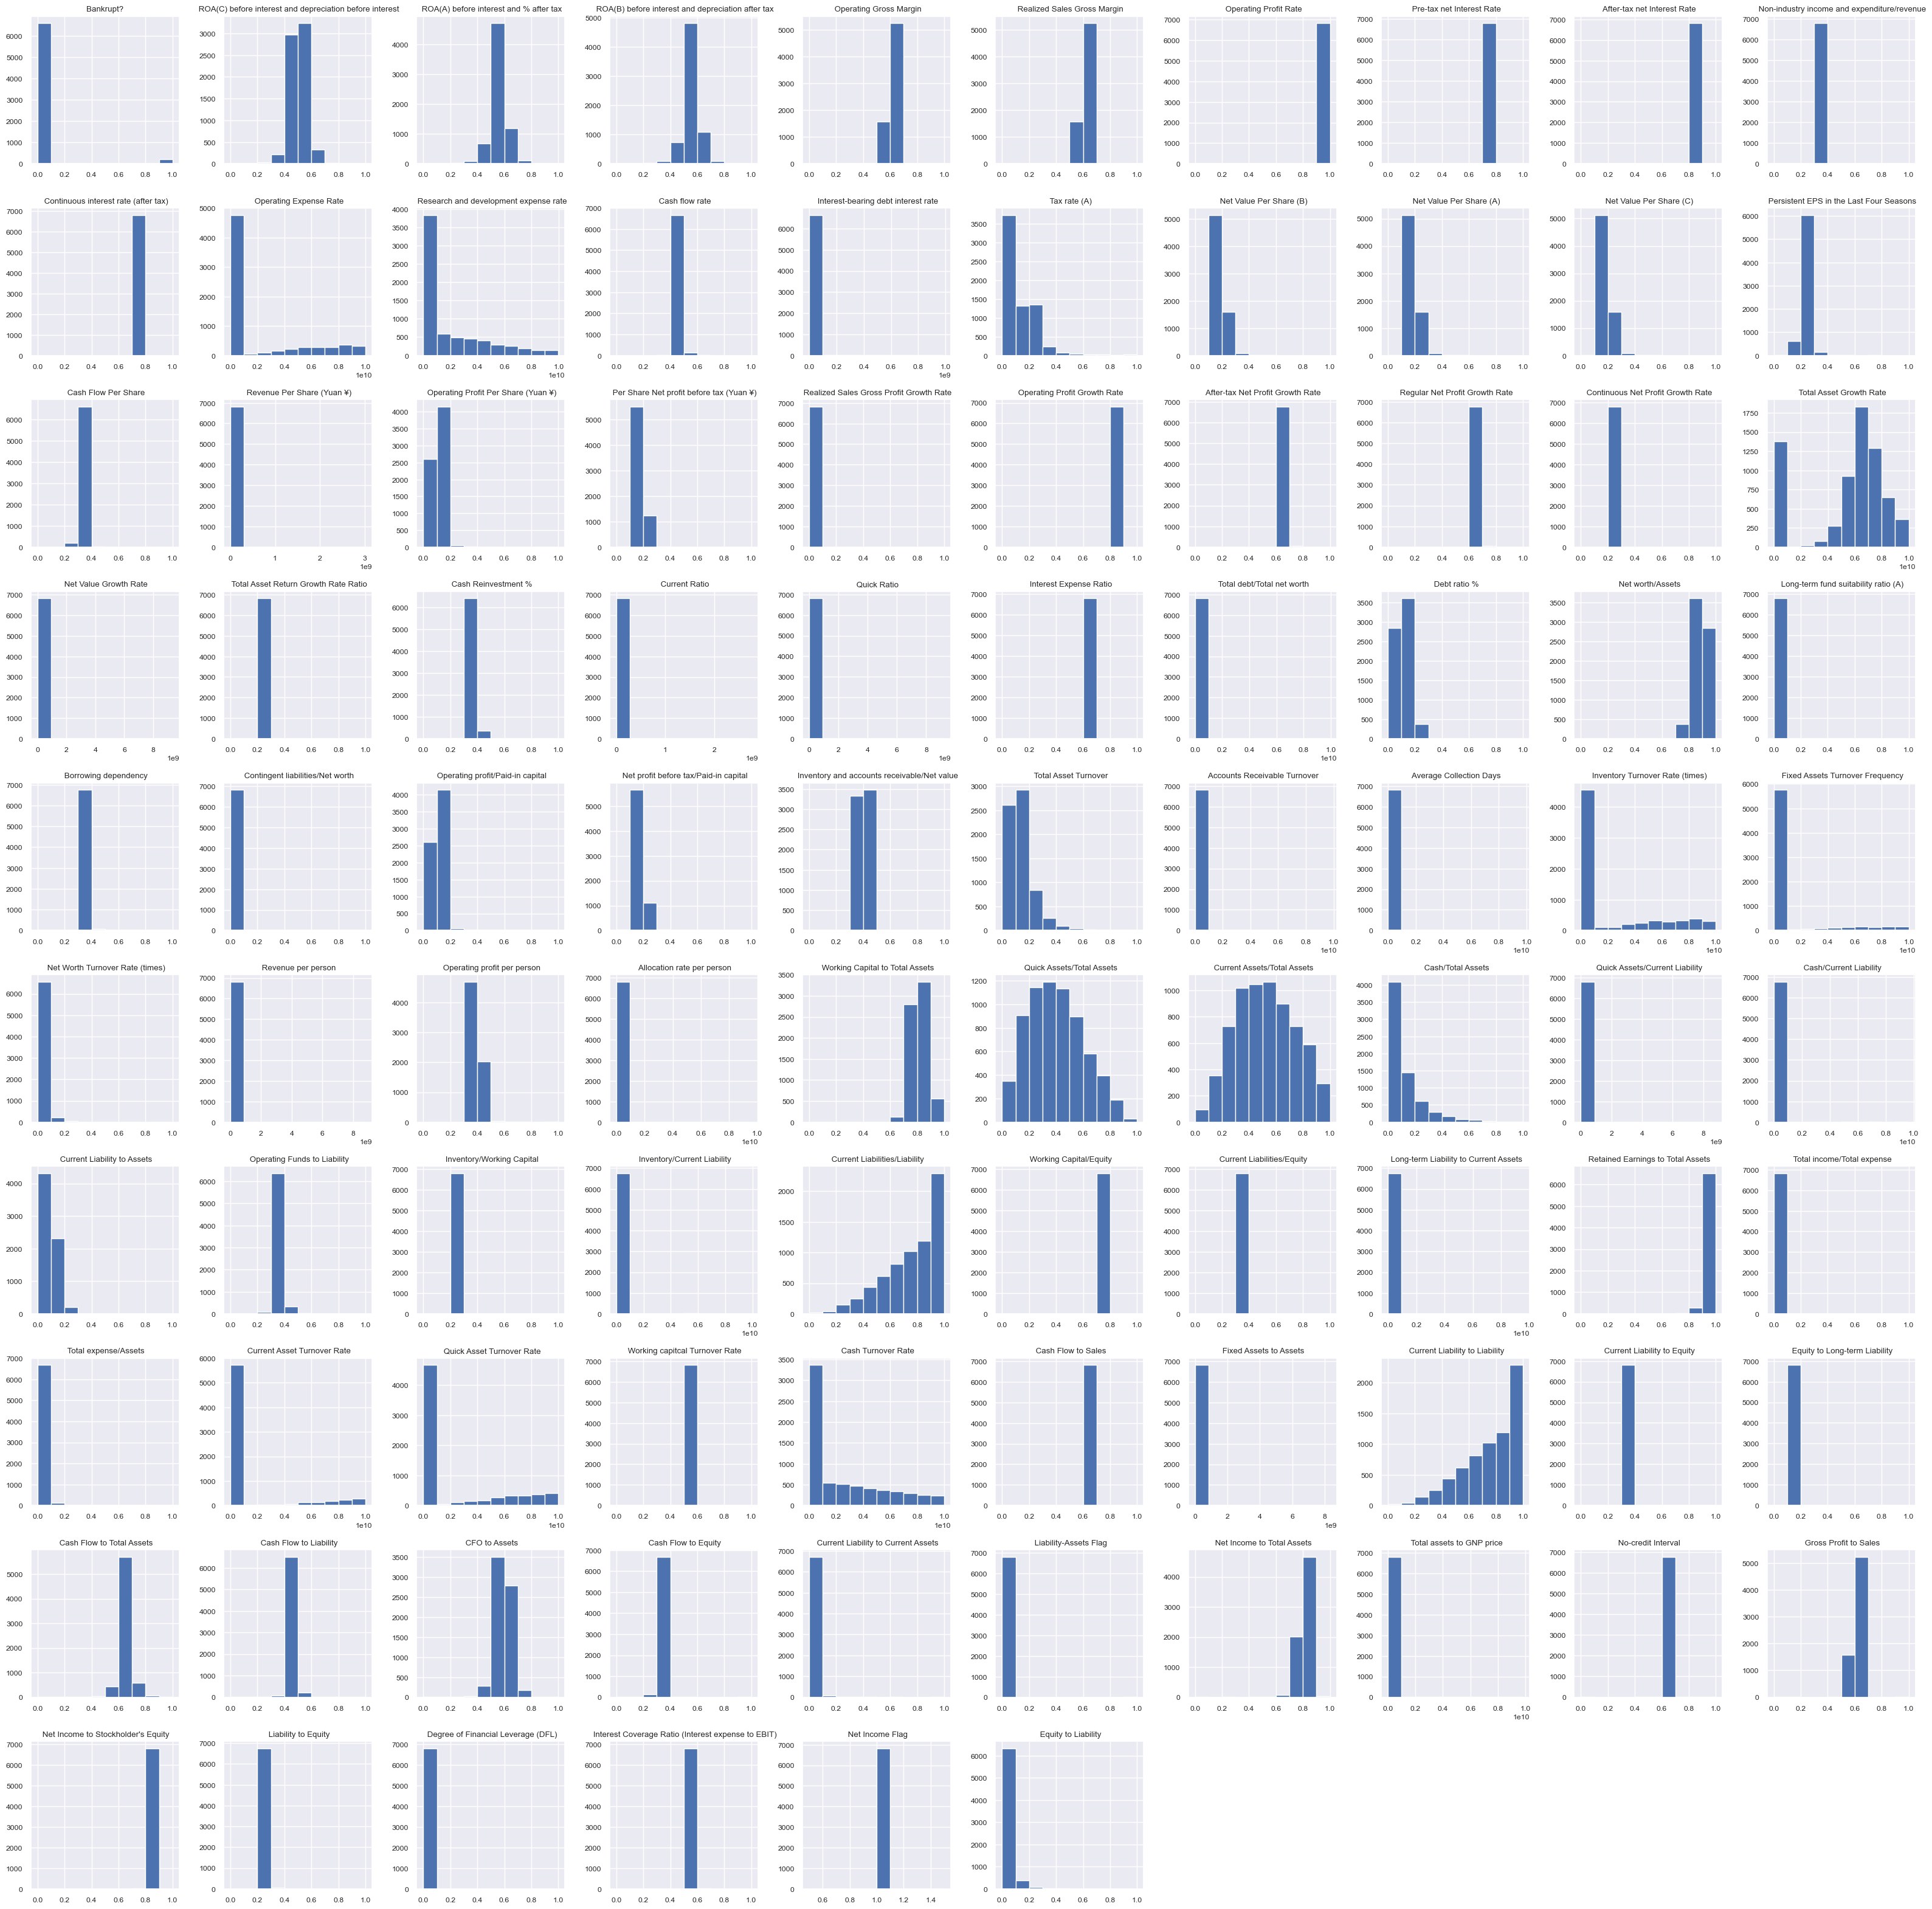

In [560]:
dataset.hist(figsize = (40,40))

### 2. Get dataset Correlation, to see connection between attributes

In [561]:
dataset_correlation = dataset.corr()
dataset_correlation

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Liability to Equity                       

In [3]:
# # Get Heatmap of dataset correlation

# plt.figure(figsize=(50, 50),dpi=600)
# g=sns.heatmap(dataset_correlation, square=True,
#             center=0, annot=True, linewidths=.5,
#             cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
# g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
# plt.title('Correlation Matrix')

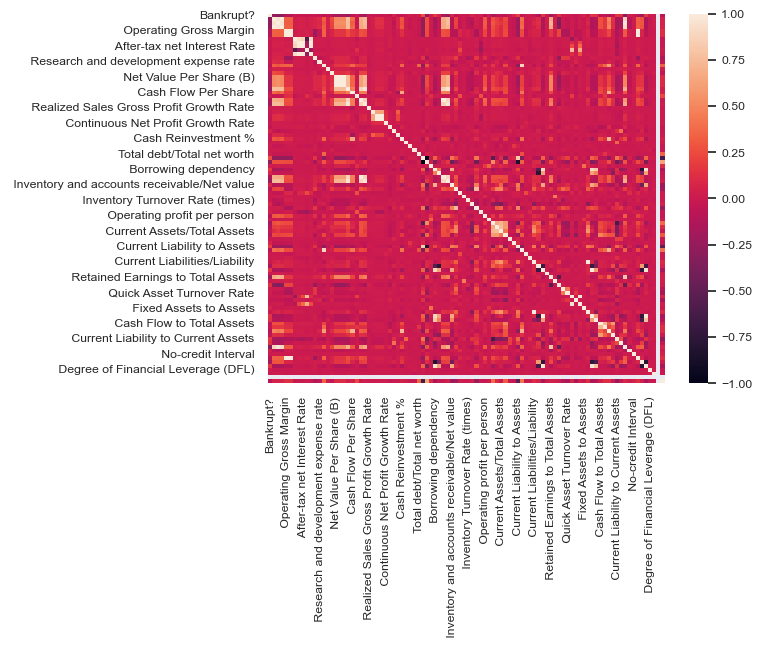

In [540]:
corr = dataset.corr()
sns.heatmap(corr);

In [229]:
# columns=[' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency', ' Net Worth Turnover Rate (times)', ' Revenue per person', ' Operating profit per person', ' Allocation rate per person', ' Working Capital to Total Assets', ' Quick Assets/Total Assets', ' Current Assets/Total Assets', ' Cash/Total Assets', ' Quick Assets/Current Liability', ' Cash/Current Liability', ' Current Liability to Assets', ' Operating Funds to Liability', ' Inventory/Working Capital', ' Inventory/Current Liability', ' Current Liabilities/Liability', ' Working Capital/Equity', ' Current Liabilities/Equity', # columns=[' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency', ' Net Worth Turnover Rate (times)', ' Revenue per person', ' Operating profit per person', ' Allocation rate per person', ' Working Capital to Total Assets', ' Quick Assets/Total Assets', ' Current Assets/Total Assets', ' Cash/Total Assets', ' Quick Assets/Current Liability', ' Cash/Current Liability', ' Current Liability to Assets', ' Operating Funds to Liability', ' Inventory/Working Capital', ' Inventory/Current Liability', ' Current Liabilities/Liability', ' Working Capital/Equity', ' Current Liabilities/Equity', ' Long-term Liability to Current Assets', ' Retained Earnings to Total Assets', ' Total income/Total expense', ' Total expense/Assets', ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate', ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets', ' Current Liability to Liability', ' Current Liability to Equity', ' Equity to Long-term Liability', ' Cash Flow to Total Assets', ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity', ' Current Liability to Current Assets', ' Liability-Assets Flag', ' Net Income to Total Assets', ' Total assets to GNP price', ' No-credit Interval', ' Gross Profit to Sales', " Net Income to Stockholder's Equity", ' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Net Income Flag', ' Equity to Liability']

# dataset2 = dataset
# dataset2 = dataset2.drop(columns,axis=1)
# dataset_correlation2 = dataset2.corr()
# plt.figure(figsize=(20, 20), dpi=600)
# g=sns.heatmap(dataset_correlation2, square=True,
#             center=0, annot=True, linewidths=.5,
#             cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
# g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
# plt.title('Correlation Matrix')

In [230]:
# # Because the attributes is too much too handle 

# df = dataset
# columns=['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', 
#         ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', 
#          ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', 
#          ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', 
#          ' Operating Expense Rate', ' Research and development expense rate']

# def get_redundant_pairs(df):
#     '''Get diagonal and lower triangular pairs of correlation matrix'''
#     pairs_to_drop = set()
#     cols = df.columns
#     for i in range(0, df.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_correlations(df):
#     au_corr = df.corr().unstack()
#     labels_to_drop = get_redundant_pairs(df)
#     au_corr = au_corr.drop(labels=labels_to_drop)
#     return au_corr

# corrplot = get_correlations(df[columns])

# fig, ax = plt.subplots(figsize =(15,15))

# norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
# colors = [plt.cm.RdYlGn(norm(c)) for c in corrplot.values]

# corrplot.plot.barh(color=colors) 

### 3. Check If dataset Balance or Not

In [231]:
total_dataset = len(dataset)
bankrupt_dataset = dataset['Bankrupt?'].value_counts()

percentage_bankrupt_true = bankrupt_dataset[1] / total_dataset * 100
percentage_bankrupt_false = bankrupt_dataset[0] / total_dataset * 100

print('total dataset: {0} dataset'.format(total_dataset))
print('Percentage of Bankruptcy dataset: Yes = {0}% and {1}% not Bankruptcy'.format(percentage_bankrupt_true, percentage_bankrupt_false))

total dataset: 6819 dataset
Percentage of Bankruptcy dataset: Yes = 3.2262795131250916% and 96.77372048687491% not Bankruptcy


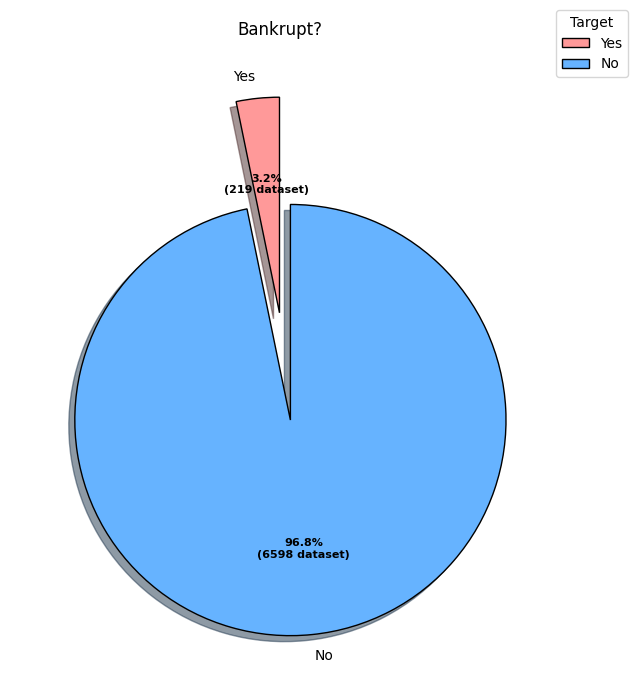

In [232]:
# Creating target
target = ['Yes', 'No']
 
# Creating target value
dataset = [bankrupt_dataset[1], bankrupt_dataset[0]]

# Creating explode dataset
explode = (0.0, 0.5)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# set color
colors = ['#ff9999','#66b3ff']
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} dataset)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(dataset,
                                  colors = colors,
                                  autopct = lambda pct: func(pct, dataset),
                                  explode = explode,
                                  labels = target,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
# Adding legend
ax.legend(wedges, target,
          title ="Target",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Bankrupt?")
 
# show plot
plt.show()

#### Note: Dari chart dapat disimpulkan bahwa, datasetset sangat tidak balance, dimana, dari 6819 terdapat 6598 (96.8%) dataset bank yang tidak bankrut dan hanya terdapat 219 (3.2%) dataset bank yang bangkrut. 

# dataset Preprocessing

## 1. Remove Useless Attributes

In [250]:
columns = [
' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax',
' ROA(B) before interest and depreciation after tax',' Realized Sales Gross Margin', ' Operating Profit Rate',
' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Net Value Per Share (B)', ' Net Value Per Share (A)',
' Net Value Per Share (C)', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)',
' Per Share Net profit before tax (Yuan ¥)', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate',
' Cash/Total Assets', ' Quick Assets/Current Liability', ' Cash/Current Liability',
' Current Liability to Assets', ' Inventory/Current Liability', ' Liability-Assets Flag', ' Gross Profit to Sales',
' Net Income Flag', ' Current Liability to Equity',
]

dataset = dataset.drop(columns,axis=1)

### New Dataset Correlation

In [251]:
dataset_correlation = dataset.corr()
dataset_correlation

Bankrupt?  \
Bankrupt?                                            1.000000   
 Operating Gross Margin                             -0.100043   
 Non-industry income and expenditure/revenue        -0.016593   
 Continuous interest rate (after tax)               -0.008395   
 Operating Expense Rate                             -0.006083   
...                                                       ...   
 Net Income to Stockholder's Equity                 -0.180987   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Equity to Liability                                -0.083048   

                                                     Operating Gross Margin  \
Bankrupt?                                                         -0.100043   
 Operating Gross Margin                                            1.000000   
 Non-industry income and expenditure/revenue                       0.051438   
 Continuous interest rate (after tax)                              0.029430   
 Operating Expense Rate                                           -0.206353   
...                                                                     ...   
 Net Income to Stockholder's Equity                                0.075304   
 Liability to Equity                                              -0.085434   
 Degree of Financial Leverage (DFL)                               -0.011806   
 Interest Coverage Ratio (Interest expense to E...                -0.001167   
 Equity to Liability                                               0.120029   

                                                     Non-industry income and expenditure/revenue  \
Bankrupt?                                                                              -0.016593   
 Operating Gross Margin                                                                 0.051438   
 Non-industry income and expenditure/revenue                                            1.000000   
 Continuous interest rate (after tax)                                                  -0.230698   
 Operating Expense Rate                                                                -0.003597   
...                                                                                          ...   
 Net Income to Stockholder's Equity                                                     0.007693   
 Liability to Equity                                                                   -0.011899   
 Degree of Financial Leverage (DFL)                                                    -0.000556   
 Interest Coverage Ratio (Interest expense to E...                                      0.001024   
 Equity to Liability                                                                    0.012293   

                                                     Continuous interest rate (after tax)  \
Bankrupt?                                                                       -0.008395   
 Operating Gross Margin                                                          0.029430   
 Non-industry income and expenditure/revenue                                    -0.230698   
 Continuous interest rate (after tax)                                            1.000000   
 Operating Expense Rate                                                          0.013168   
...                                                                                   ...   
 Net Income to Stockholder's Equity                                              0.011191   
 Liability to Equity                                                            -0.002996   
 Degree of Financial Leverage (DFL)                                              0.000774   
 Interest Coverage Ratio (Interest expense to E...                               0.000798   
 Equity to Liability                                                            -0.011299   

    

In [252]:
# # Get Heatmap of dataset correlation

# plt.figure(figsize=(50, 50),dpi=600)
# g=sns.heatmap(dataset_correlation, square=True,
#             center=0, annot=True, linewidths=.5,
#             cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
# g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
# plt.title('Correlation Matrix')

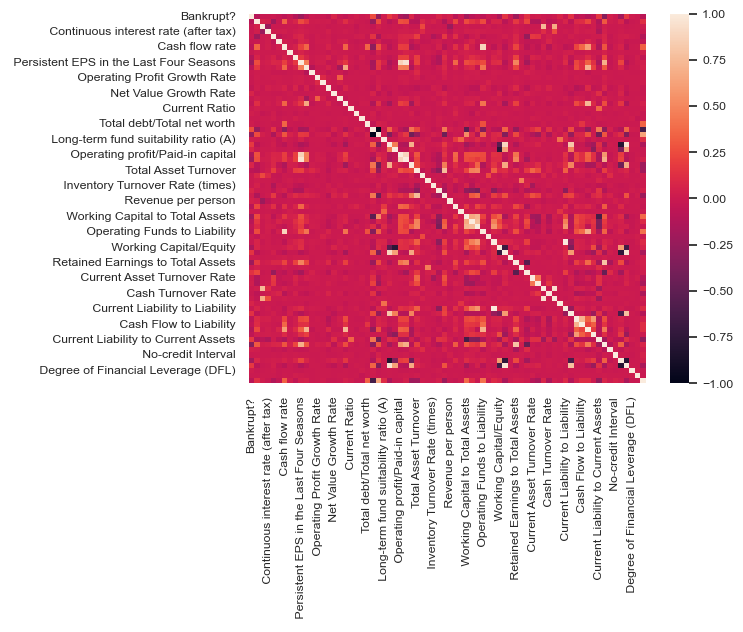

In [253]:
corr = dataset.corr()
sns.heatmap(corr);

In [254]:
df = dataset
df.shape[1]
df[df.columns[0:df.shape[1]]].corr()['Bankrupt?']

Bankrupt?                                              1.000000
 Operating Gross Margin                               -0.100043
 Non-industry income and expenditure/revenue          -0.016593
 Continuous interest rate (after tax)                 -0.008395
 Operating Expense Rate                               -0.006083
                                                         ...   
 Net Income to Stockholder's Equity                   -0.180987
 Liability to Equity                                   0.166812
 Degree of Financial Leverage (DFL)                    0.010508
 Interest Coverage Ratio (Interest expense to EBIT)   -0.005509
 Equity to Liability                                  -0.083048
Name: Bankrupt?, Length: 72, dtype: float64

In [277]:
df_corr = df[df.columns[0:df.shape[1]]].corr()['Bankrupt?']
highest_corr = []
temp = 0.13

# for i in range(len(df_corr)):
#     dict = {df.columns[i]:df_corr[i]}
#     highest_corr.append(dict)
        
for i in range(len(df_corr)):
    if temp < df_corr[i]: 
        dict = {df.columns[i]:df_corr[i]}
        highest_corr.append(dict)

highest_corr

[{'Bankrupt?': 1.0},
 {' Debt ratio %': 0.25016096206661775},
 {' Borrowing dependency': 0.1765429361615994},
 {' Current Liabilities/Equity': 0.1538283619069691},
 {' Total expense/Assets': 0.13904921596620506},
 {' Equity to Long-term Liability': 0.139013572544475},
 {' Current Liability to Current Assets': 0.17130604352180528},
 {' Liability to Equity': 0.16681209778111403}]

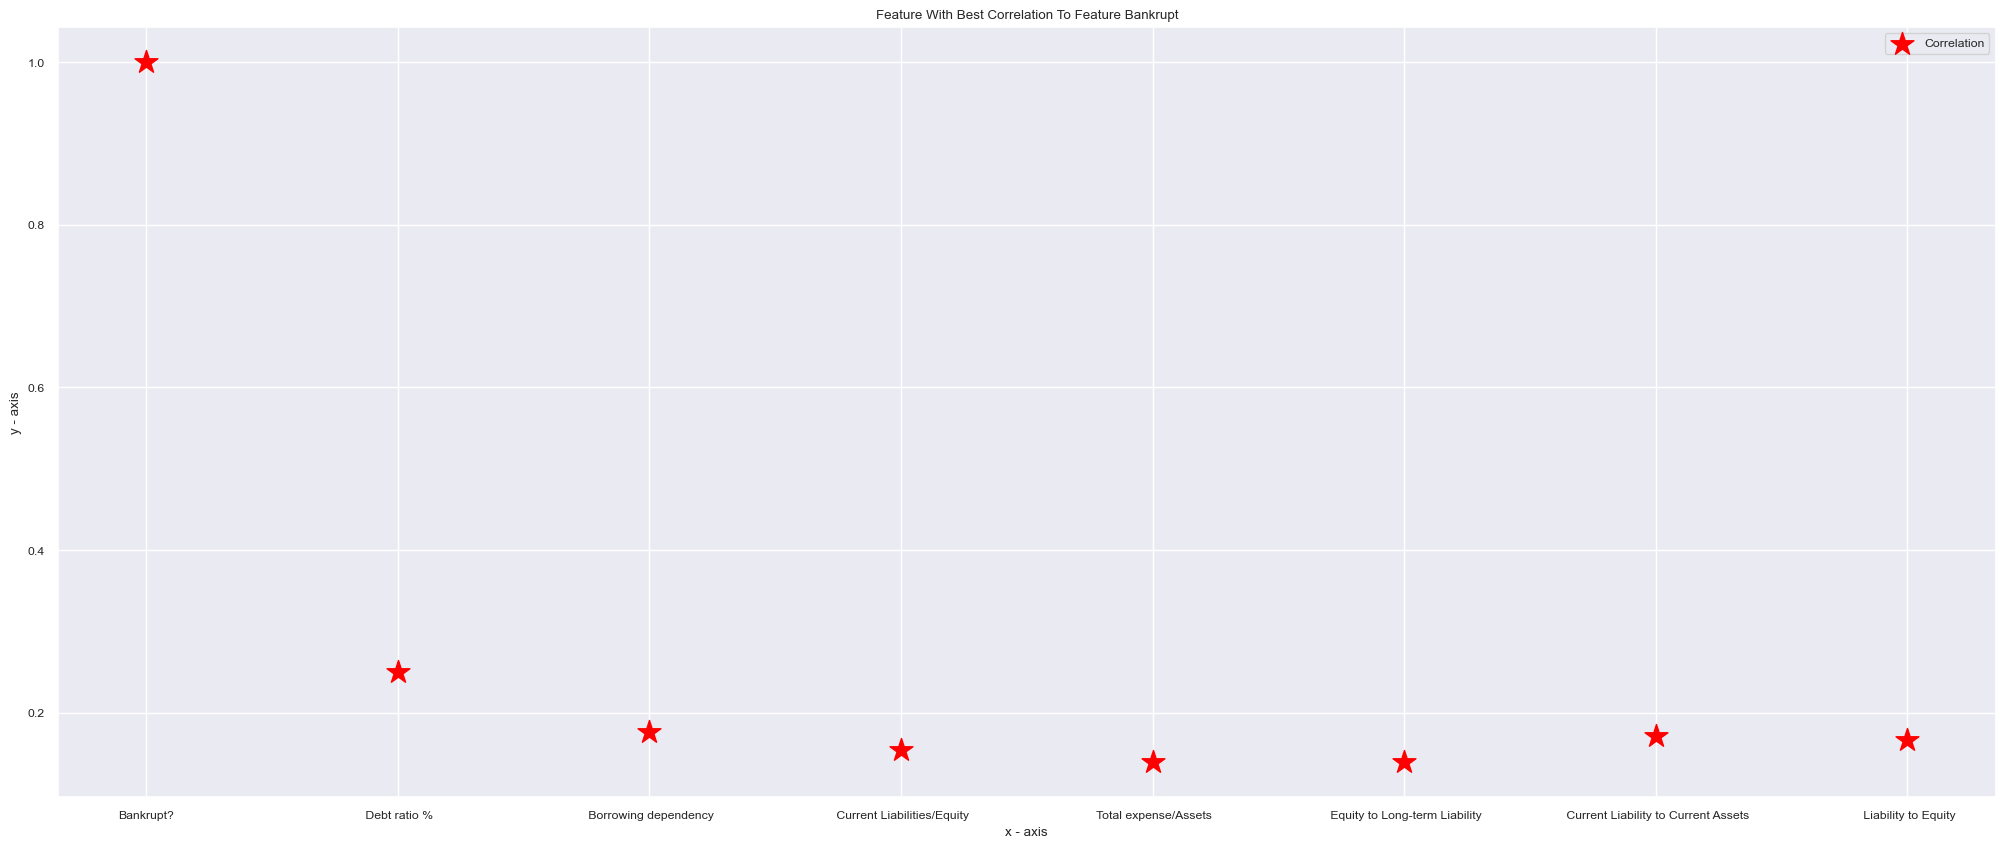

In [278]:
x = []
y = []
temp = 0.13

for i in range(len(df_corr)):
    if temp < df_corr[i]: 
        x.append(df.columns[i])
        y.append(df_corr[i])

# plotting points as a scatter plot
plt.scatter(x, y, label= "Correlation", color= "Red", 
            marker= "*", s=300)
plt.gcf().set_size_inches((25, 10))
  
# x-axis label
plt.xlabel('x - axis')
# frequency label
plt.ylabel('y - axis')
# plot title
plt.title('Feature With Best Correlation To Feature Bankrupt')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()


array([[<AxesSubplot: title={'center': 'Bankrupt?'}>,
        <AxesSubplot: title={'center': ' Operating Gross Margin'}>,
        <AxesSubplot: title={'center': ' Non-industry income and expenditure/revenue'}>,
        <AxesSubplot: title={'center': ' Continuous interest rate (after tax)'}>,
        <AxesSubplot: title={'center': ' Operating Expense Rate'}>,
        <AxesSubplot: title={'center': ' Research and development expense rate'}>,
        <AxesSubplot: title={'center': ' Cash flow rate'}>,
        <AxesSubplot: title={'center': ' Interest-bearing debt interest rate'}>],
       [<AxesSubplot: title={'center': ' Tax rate (A)'}>,
        <AxesSubplot: title={'center': ' Persistent EPS in the Last Four Seasons'}>,
        <AxesSubplot: title={'center': ' Cash Flow Per Share'}>,
        <AxesSubplot: title={'center': ' Realized Sales Gross Profit Growth Rate'}>,
        <AxesSubplot: title={'center': ' Operating Profit Growth Rate'}>,
        <AxesSubplot: title={'center': ' Contin

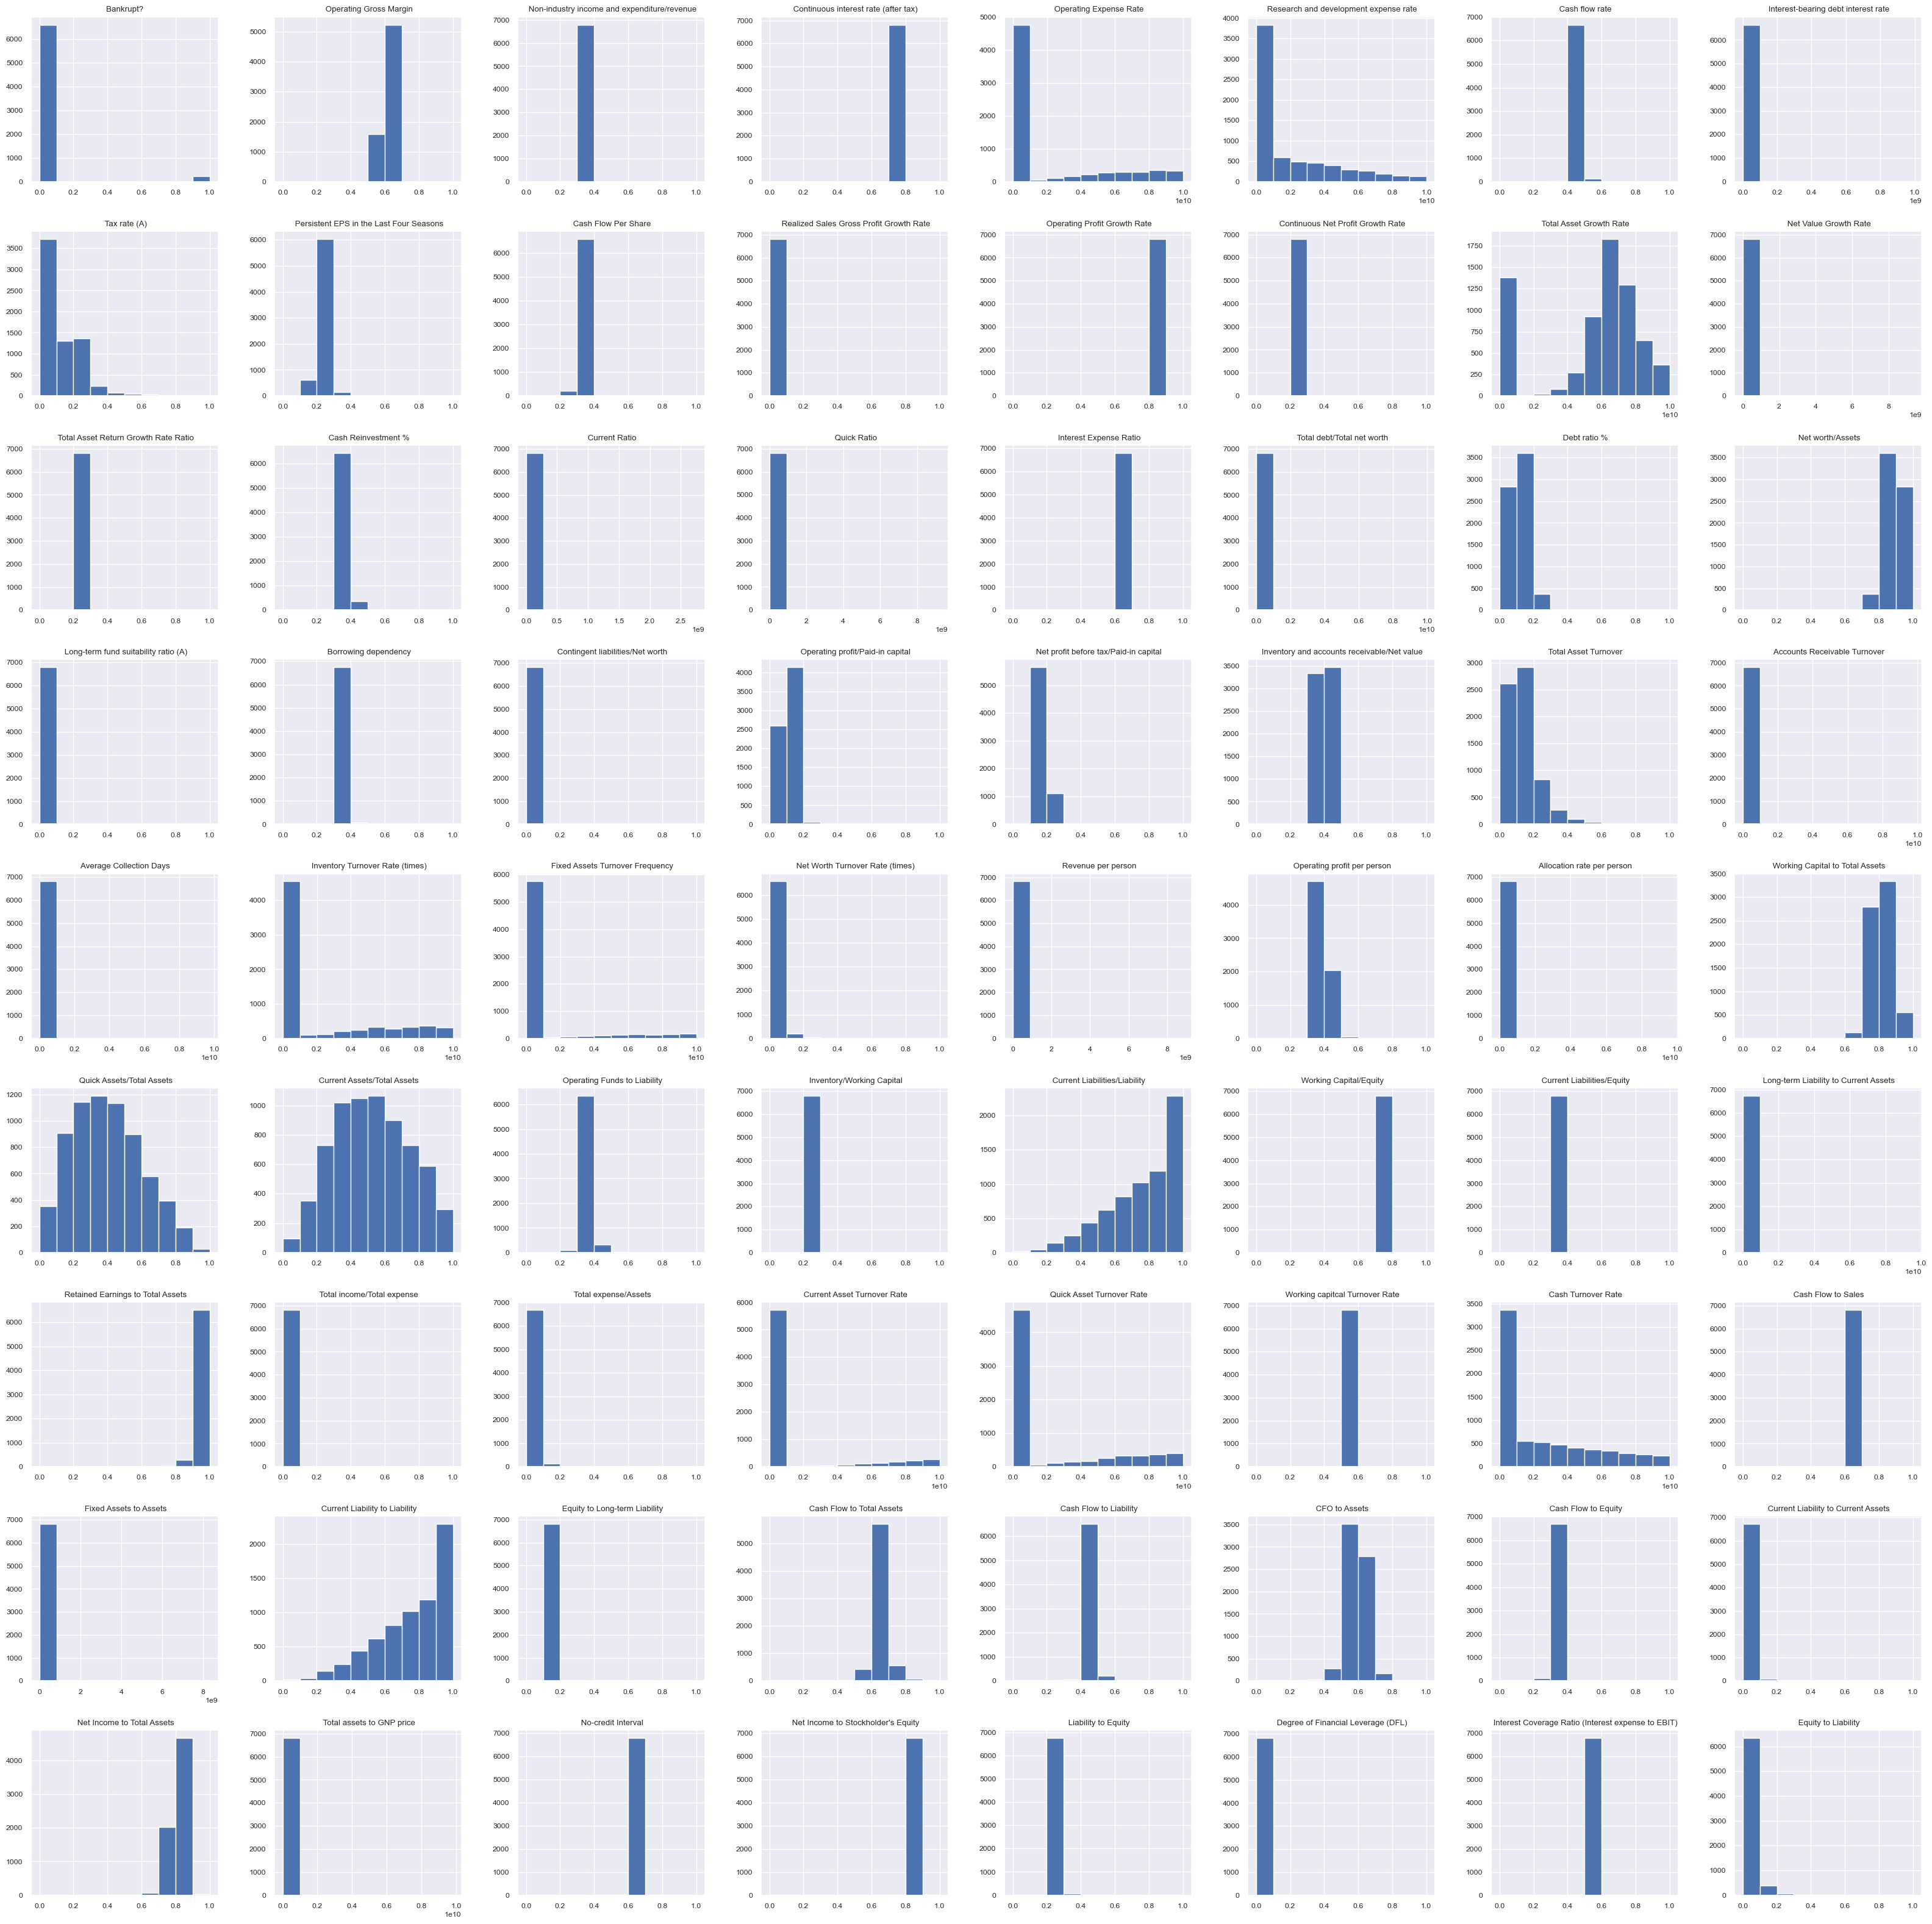

In [257]:
dataset.hist(figsize = (40,40))

## 2. Remove Null Values

In [55]:
dataset.isnull().sum()

Bankrupt?                                              0
 Operating Gross Margin                                0
 Non-industry income and expenditure/revenue           0
 Continuous interest rate (after tax)                  0
 Operating Expense Rate                                0
                                                      ..
 No-credit Interval                                    0
 Net Income to Stockholder's Equity                    0
 Liability to Equity                                   0
 Degree of Financial Leverage (DFL)                    0
 Interest Coverage Ratio (Interest expense to EBIT)    0
Length: 71, dtype: int64

In [56]:
dataset.isnull().any()

Bankrupt?                                              False
 Operating Gross Margin                                False
 Non-industry income and expenditure/revenue           False
 Continuous interest rate (after tax)                  False
 Operating Expense Rate                                False
                                                       ...  
 No-credit Interval                                    False
 Net Income to Stockholder's Equity                    False
 Liability to Equity                                   False
 Degree of Financial Leverage (DFL)                    False
 Interest Coverage Ratio (Interest expense to EBIT)    False
Length: 71, dtype: bool

<AxesSubplot: >

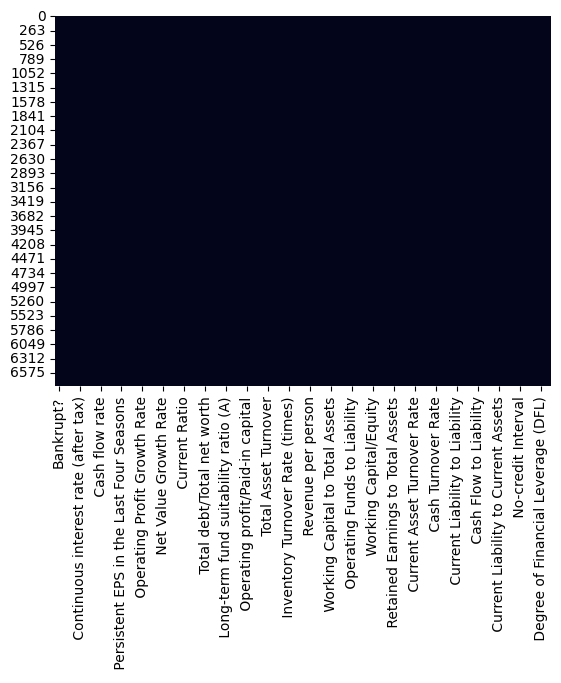

In [57]:
sns.heatmap(dataset.isnull(), cbar=False)

### Dataset Tidak Null, Akan tetapi terdapat incosistensi penulisan dataset
### Sehingga dilakukan perbaikan terhadap inconsistensi dataset

#### Dataset dengan penulisan inconesitency yang pertama adalah tax rate (A)

In [58]:
dataset[' Tax rate (A)'].value_counts()

0.000000    2568
0.253062       7
0.000405       7
0.113777       6
0.252657       6
            ... 
0.405810       1
0.208827       1
0.259540       1
0.029963       1
0.490839       1
Name:  Tax rate (A), Length: 2488, dtype: int64

In [59]:
std = dataset[' Tax rate (A)'].std()
std

0.13866749672835132

In [60]:
# define list
dataset[' Tax rate (A)'] = dataset[' Tax rate (A)']
  
for i in range(len(dataset[' Tax rate (A)'])):
    if dataset[' Tax rate (A)'][i] == 0.0:
        dataset[' Tax rate (A)'][i] = std
        
# print list
dataset[' Tax rate (A)'].value_counts()


C:\Users\User\AppData\Local\Temp\ipykernel_33492\2692420800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Tax rate (A)'][i] = std


0.138667    2568
0.253062       7
0.000405       7
0.113777       6
0.252657       6
            ... 
0.405810       1
0.208827       1
0.259540       1
0.029963       1
0.490839       1
Name:  Tax rate (A), Length: 2488, dtype: int64

#### Dataset dengan inconsistency yang kedua adalah Long-term liability to current assets

In [61]:
dataset[' Long-term Liability to Current Assets'].value_counts()

0.000000e+00    2569
5.790000e+08       2
2.790000e+08       2
2.559237e-02       1
2.268326e-02       1
                ... 
3.255339e-03       1
2.278838e-03       1
3.893648e-03       1
1.029732e-03       1
3.200000e+09       1
Name:  Long-term Liability to Current Assets, Length: 4249, dtype: int64

In [62]:
for i in dataset[' Long-term Liability to Current Assets']:
    print(i)

0.02559236799775
0.0239468186673397
0.0037151156933692
0.0221651997451294
0.0
0.0037725048904946
0.0093474263545427
0.0053456555444072
0.0
0.0049506820858788
0.0641265281527166
0.0178464059959841
0.0095131798604985
0.004786619061247
0.0226820286711224
0.0163230488730028
0.0174691601196355
0.0102426745166861
0.0184786263384258
0.0017722279173155
0.0
0.0
0.0234307439275479
0.0102876909592216
0.0123261709166218
0.0468582224978654
0.0097970861017922
0.0
0.0069329383688421
0.0015541133461602
0.027677718850612
0.0042275251592367
0.00858359996019
0.0
0.0028954007971214
0.101679046719901
0.0315335463618526
0.016531425239152
0.0099565371612063
0.0168205741253573
0.0228518396585358
0.0137246049020913
0.0080202762242069
0.0120501666287036
0.0022586255564418
0.0
0.0
0.0179079946382758
0.010178969917791
0.0096736935365059
0.0455951060292169
0.0037385485980368
0.0
0.0029870185384227
0.0727176486067898
0.0066015292408757
0.0117061524797009
0.0
0.0129459703302182
0.0069421924961547
0.0
0.0079291067018

In [63]:
def converting_number(number): 
    len_number = len(number) - 2
    float_number = int(len_number) * '0'
    float_number = '10' + float_number
    int_number = int(float(number))
    x = int_number * (1 / int(float_number))
    return x

In [64]:
dataset[' Long-term Liability to Current Assets'] = dataset[' Long-term Liability to Current Assets']

for i in range(len(dataset[' Long-term Liability to Current Assets'])):
    if str(dataset[' Long-term Liability to Current Assets'][i]).startswith('0') == False:
        temp = dataset[' Long-term Liability to Current Assets'][i]
        dataset[' Long-term Liability to Current Assets'][i] = converting_number(str(temp))
    print(dataset[' Long-term Liability to Current Assets'][i])

0.02559236799775
0.0239468186673397
0.0037151156933692
0.0221651997451294
0.0
0.0037725048904946
0.0093474263545427
0.0053456555444072
0.0
0.0049506820858788
0.0641265281527166
0.0178464059959841
0.0095131798604985
0.004786619061247
0.0226820286711224
0.0163230488730028
0.0174691601196355
0.0102426745166861
0.0184786263384258
0.0017722279173155
0.0
0.0
0.0234307439275479
0.0102876909592216
0.0123261709166218
0.0468582224978654
0.0097970861017922
0.0
0.0069329383688421
0.0015541133461602
0.027677718850612
0.0042275251592367
0.00858359996019
0.0
0.0028954007971214
0.101679046719901
0.0315335463618526
0.016531425239152
0.0099565371612063
0.0168205741253573
0.0228518396585358
0.0137246049020913
0.0080202762242069
0.0120501666287036
0.0022586255564418
0.0
0.0
0.0179079946382758
0.010178969917791
0.0096736935365059
0.0455951060292169
0.0037385485980368
0.0
0.0029870185384227
0.0727176486067898
0.0066015292408757
0.0117061524797009
0.0
0.0129459703302182
0.0069421924961547
0.0
0.0079291067018

C:\Users\User\AppData\Local\Temp\ipykernel_33492\3934689004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Long-term Liability to Current Assets'][i] = converting_number(str(temp))


In [65]:
std = dataset[' Long-term Liability to Current Assets'].std()
std

0.016903218472478467

In [66]:
for i in range(len(dataset[' Long-term Liability to Current Assets'])):
    if dataset[' Long-term Liability to Current Assets'][i] == 0.0:
        dataset[' Long-term Liability to Current Assets'][i] = std
        
# print list
dataset[' Tax rate (A)'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_33492\3861313832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Long-term Liability to Current Assets'][i] = std


0.138667    2568
0.253062       7
0.000405       7
0.113777       6
0.252657       6
            ... 
0.405810       1
0.208827       1
0.259540       1
0.029963       1
0.490839       1
Name:  Tax rate (A), Length: 2488, dtype: int64

#### Dataset dengan inconsistency yang ketiga adalah Operating Expense Rate

In [67]:
dataset[' Operating Expense Rate'].value_counts()

5.530000e+09    10
9.860000e+09    10
1.716046e-04    10
8.480000e+09     9
4.720000e+09     9
                ..
1.546985e-03     1
7.916474e-04     1
3.529226e-04     1
2.622636e-04     1
1.431695e-03     1
Name:  Operating Expense Rate, Length: 2966, dtype: int64

In [68]:
for i in dataset[' Operating Expense Rate']:
    print(i)

0.0001256968688759
0.0002897850537287
0.0002361297205563
0.0001078888488144
7890000000.0
0.0001571499952184
0.0003984833580005
9000000000.0
0.000168713644609
5820000000.0
0.0003181159947357
0.000476653627881
0.0001571499952184
0.0001137863100036
9370000000.0
0.0003237821829371
0.000179814748024
0.000248734098392
5630000000.0
0.0006113701432817
0.0003630985908652
0.0001609659995173
0.0003166127203149
0.0001717201934506
94100000.0
0.0003359240147973
0.0003980208120249
0.0001157521304
0.0001259281418637
8480000000.0
0.0001624692739381
0.0003602076785175
9040000000.0
0.0001837463888168
6190000000.0
0.0003272512777543
0.0004354870360504
0.0001665165512248
0.0001102015786925
9340000000.0
0.0003420527489743
0.0001714889204627
0.0002856221399481
4980000000.0
0.0005824610198051
0.0003628673178774
0.0001653601862857
0.0003056272533939
0.0002124242393055
0.0001140175829914
0.0003396243826023
0.000362173498914
0.0001217652280831
0.0001193368617111
8270000000.0
693000000.0
0.0002766024934234
0.0001

In [69]:
dataset[' Operating Expense Rate'] = dataset[' Operating Expense Rate']

for i in range(len(dataset[' Operating Expense Rate'])):
    if str(dataset[' Operating Expense Rate'][i]).startswith('0') == False:
        temp = dataset[' Operating Expense Rate'][i]
        dataset[' Operating Expense Rate'][i] = converting_number(str(temp))
    print(dataset[' Operating Expense Rate'][i])

0.0001256968688759
0.0002897850537287
0.0002361297205563
0.0001078888488144
0.0789
0.0001571499952184
0.0003984833580005
0.09
0.000168713644609
0.058199999999999995
0.0003181159947357
0.000476653627881
0.0001571499952184
0.0001137863100036
0.09369999999999999
0.0003237821829371
0.000179814748024
0.000248734098392
0.056299999999999996
0.0006113701432817
0.0003630985908652
0.0001609659995173
0.0003166127203149
0.0001717201934506
0.0941
0.0003359240147973
0.0003980208120249
0.0001157521304
0.0001259281418637
0.0848
0.0001624692739381
0.0003602076785175
0.0904
0.0001837463888168
0.0619
0.0003272512777543
0.0004354870360504
0.0001665165512248
0.0001102015786925
0.0934
0.0003420527489743
0.0001714889204627
0.0002856221399481
0.0498
0.0005824610198051
0.0003628673178774
0.0001653601862857
0.0003056272533939
0.0002124242393055
0.0001140175829914
0.0003396243826023
0.000362173498914
0.0001217652280831
0.0001193368617111
0.0827
0.0693
0.0002766024934234
0.0001765769261946
0.0003580105851333
0.08

C:\Users\User\AppData\Local\Temp\ipykernel_33492\1095702386.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Operating Expense Rate'][i] = converting_number(str(temp))


0.0001098546692108
0.0005061409338271
0.08549999999999999
0.06309999999999999
0.0003057428898878
0.0002320824432696
0.0001496336231145
0.0001315943300651
0.0004416157702275
0.0807
0.0001716045569566
0.0001090452137534
0.00012315286601
0.059199999999999996
0.0001644350943345
0.0001143644924731
0.0001672103701882
0.000113323764028
0.0002564817434837
0.0002787995868076
0.0001601565440599
0.0005301933245596
0.0001980853140612
0.0001561092667732
0.0001928816718354
0.0004972369237963
0.0005090318461747
0.0005079911177296
0.0638
0.0001506743515596
0.0002826155911065
0.0002464213685139
0.0001140175829914
0.000120608863144
0.0002145056961958
0.0002293071674158
0.0001487085311632
0.0006608625626735
0.0001439674349131
0.0002552097420508
0.0004921489180644
0.0001047666634789
0.0002257224361047
0.0006842211344425
0.0002564817434837
0.0001260437783576
0.0002713988511976
0.0001823587508899
0.0002198249749155
0.0676
0.000112051762595
0.00036205786242
0.0001799303845179
0.0002217907953119
0.089
0.00011

0.0807
0.0001424641604923
0.0004625459756245
0.0001499805325962
0.09219999999999999
0.0561
0.0001234997754917
0.0001673260066821
0.0003235509099493
0.0001466270742729
0.08439999999999999
0.08299999999999999
0.0001216495915892
0.0001335601504615
0.0001627005469259
0.0001547216288464
0.0001104328516803
0.028599999999999997
0.0001647820038162
0.012299999999999998
0.06509999999999999
0.0829
0.0001897594864999
0.0001584219966513
0.0002382111774466
0.0001869842106462
0.0001475521662242
0.0002461900955261
0.0667
0.0002946417864728
0.06949999999999999
0.0002201718843972
0.0004442754095873
0.07809999999999999
0.0586
0.0001177179507964
0.0001972758586038
0.0001450081633582
0.0001620067279624
0.0001067324838753
0.0002589101098558
0.0822
0.00021670278958
0.001863829008779
0.0001177179507964
0.051500000000000004
0.0416
0.0404
0.0002260693455864
0.0001151739479305
0.051899999999999995
0.000153912173389
0.0002510468282702
0.0002006293169271
0.0001543747193646
0.0506
0.0001384168832056
0.0001102015786

In [70]:
dataset[' Operating Expense Rate'].value_counts()

0.098600    10
0.000172    10
0.055300    10
0.047200     9
0.084000     9
            ..
0.000349     1
0.000370     1
0.000121     1
0.000470     1
0.001432     1
Name:  Operating Expense Rate, Length: 2964, dtype: int64

#### Note: Tidak terdapat Null Values pada datasetset, sehingga step ini langsung selesai 

### 3. Balancing dataset

In [280]:
x= dataset.drop('Bankrupt?', axis=1) 
x

Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                    0.601457                                      0.302646   
1                    0.610235                                      0.303556   
2                    0.601450                                      0.302035   
3                    0.583541                                      0.303350   
4                    0.598783                                      0.303475   
...                       ...                                           ...   
6814                 0.604455                                      0.303510   
6815                 0.598308                                      0.303520   
6816                 0.610444                                      0.303512   
6817                 0.607850                                      0.303498   
6818                 0.627409                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
0                                  0.780985             1.256969e-04   
1                                  0.781506             2.897851e-04   
2                                  0.780284             2.361297e-04   
3                                  0.781241             1.078888e-04   
4                                  0.781550             7.890000e+09   
...                                     ...                      ...   
6814                               0.781588             1.510213e-04   
6815                               0.781586             5.220000e+09   
6816                               0.781546             2.509312e-04   
6817                               0.781663             1.236154e-04   
6818                               0.786079             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
0                               0.000000e+00         0.458143   
1                               0.000000e+00         0.461867   
2                               2.550000e+07         0.458521   
3                               0.000000e+00         0.465705   
4                               0.000000e+00         0.462746   
...                                      ...              ...   
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
0                             7.250725e-04       0.000000   
1                             6.470647e-04       0.000000   
2                             7.900790e-04       0.000000   
3                             4.490449e-04       0.000000   
4                             6.860686e-04       0.000000   
...                                    ...            ...   
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.181294   
6818                          5.900000e+08       0.000000   

       Persistent EPS in the Last Four Seasons   Cash Flow Per Share  ...  \
0                                     0.169141              0.311664  ...   
1                                     0.208944              0.318137  ...   
2                                     0.180581              0.307102  ...   
3                                     0.193722              0.321674  ...   
4                                     0.212537              0.319162  ...   
...                                        ...                   ...  ...   
6814                                  0.216602              0.320966  ...   
6815                                  0.216697              0.3

In [281]:
y = dataset['Bankrupt?']
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [282]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state= None) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5455, 71), (1364, 71), (5455,), (1364,))

In [283]:
y_train.value_counts()

0    5290
1     165
Name: Bankrupt?, dtype: int64

### A. Oversampling with random sampling

In [284]:
# Define random over sampling to var ros
ros = over_sampling.RandomOverSampler(random_state = 0)
ros

RandomOverSampler(random_state=0)

### Oversampling training dataset

In [285]:
y_train.value_counts()

0    5290
1     165
Name: Bankrupt?, dtype: int64

In [286]:
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
y_train_ros.value_counts()

0    5290
1    5290
Name: Bankrupt?, dtype: int64

### Oversampling Test Dataset

In [287]:
y_test.value_counts()

0    1309
1      55
Name: Bankrupt?, dtype: int64

In [288]:
x_test_ros, y_test_ros = ros.fit_resample(x_test, y_test)
y_test_ros.value_counts()

0    1309
1    1309
Name: Bankrupt?, dtype: int64

### B. Oversampling with SMOTE method

In [289]:
sm = over_sampling.SMOTE()
sm

SMOTE()

### Oversampling Training Dataset

In [290]:
y_train.value_counts()

0    5290
1     165
Name: Bankrupt?, dtype: int64

In [291]:
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
y_train_sm.value_counts()

0    5290
1    5290
Name: Bankrupt?, dtype: int64

### Oversampling Testing Dataset

In [292]:
y_test.value_counts()

0    1309
1      55
Name: Bankrupt?, dtype: int64

In [293]:
x_test_sm, y_test_sm = sm.fit_resample(x_test, y_test)
y_test_sm.value_counts()

0    1309
1    1309
Name: Bankrupt?, dtype: int64

### 4. Model Creation

### A. Without Balancing datasetset

In [294]:
classifier= RandomForestClassifier(n_estimators = 20, criterion="entropy", max_features= 8, max_depth = None)  
classifier= classifier.fit(x_train, y_train) 
classifier

RandomForestClassifier(criterion='entropy', max_features=8, n_estimators=20)

In [295]:
y_pred= classifier.predict(x_test) 

In [296]:
confusion_matrix, classification_report
print(classifier)
print(accuracy_score(y_test, y_pred))

RandomForestClassifier(criterion='entropy', max_features=8, n_estimators=20)
0.9560117302052786


#### Note: Disini saya mencoba membuat model tanpa melakukan balancing datasetset, dan terlihat bahwa akurasinya mencapai 0.97 

#### Akan tetapi dikarenakan datasetset yang tidak balance, maka walaupun akurasinya tinggi tetapi model tersebut tidak lah baik, karena kemungkinan untuk terjadi OVERFITTING sangat tinggi.

#### OVERFITTING sangat mungkin terjadi karena kemungkinan besar model hanya bisa mengenali bank yang tidak bangkrut saja

### B. With OVERSAMPLING method RANDOM SAMPLING

#### B(a). Random Forest Algorithm

In [297]:
classifier= RandomForestClassifier(n_estimators = 71, criterion="entropy", max_features= 72, max_depth = None)
classifier

RandomForestClassifier(criterion='entropy', max_features=71, n_estimators=71)

In [298]:
classifier_ros= classifier.fit(x_train_ros, y_train_ros) 
classifier_ros

RandomForestClassifier(criterion='entropy', max_features=71, n_estimators=71)

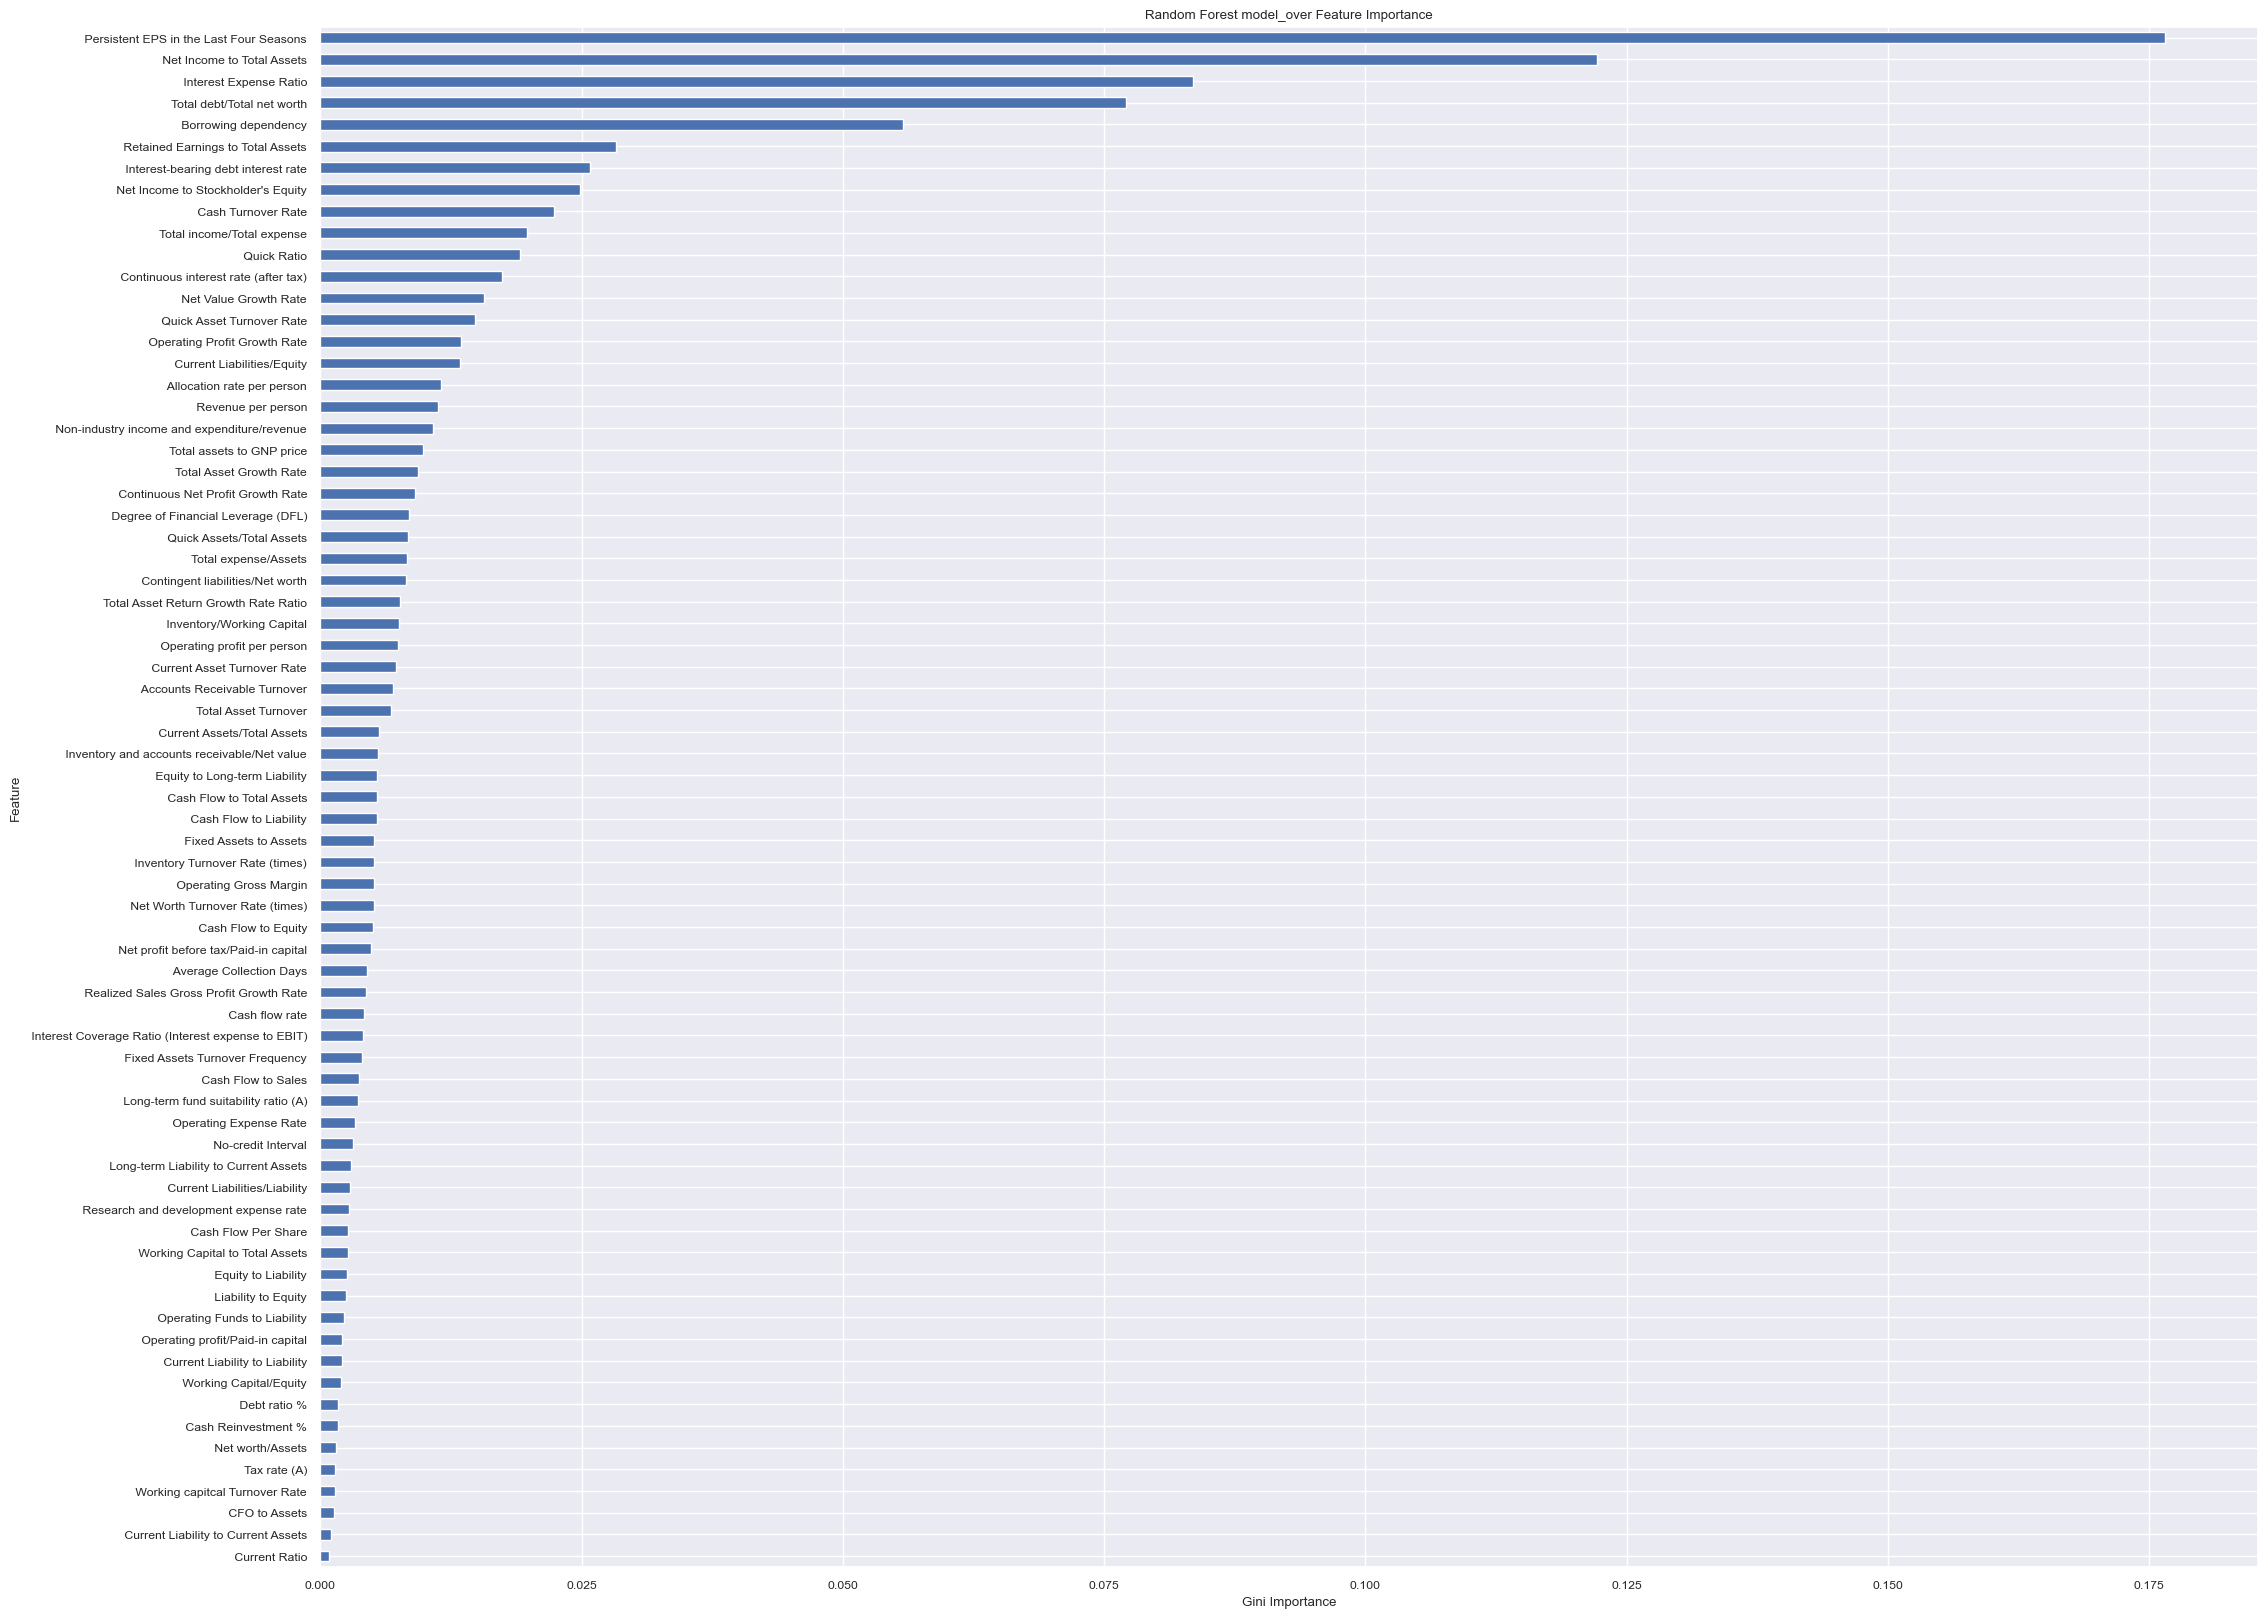

In [299]:
# sorted_idx = classifier_ros.feature_importances_.argsort()
# plt.barh(df.columns[sorted_idx], classifier_ros.feature_importances_[sorted_idx])
# plt.gcf().set_size_inches((25, 20))
# plt.xlabel("Random Forest Feature Importance")

importances = classifier_ros.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Random Forest Model Evaluation

In [302]:
# Model Accuracy
y_pred= classifier_ros.predict(x_test_ros) 
print(classifier_ros)
print(accuracy_score(y_test_ros, y_pred))

RandomForestClassifier(criterion='entropy', max_features=71, n_estimators=71)
0.6501145912910619


In [303]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1286,   23],
       [ 893,  416]], dtype=int64)

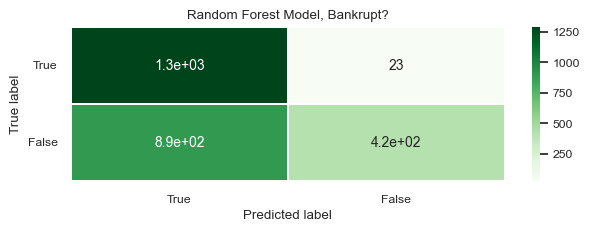

In [304]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [305]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.98      0.74      1309
           1       0.95      0.32      0.48      1309

    accuracy                           0.65      2618
   macro avg       0.77      0.65      0.61      2618
weighted avg       0.77      0.65      0.61      2618



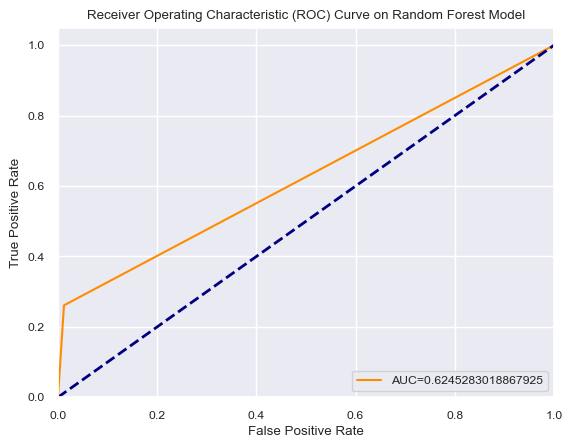

In [232]:
fpr, tpr, _ = mt.roc_curve(y_test_ros,  y_pred)
auc = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### B(b). Decision Tree Algorithm

[Text(0.53515625, 0.9910714285714286, 'X[8] <= 0.213\ngini = 0.5\nsamples = 10580\nvalue = [5290, 5290]'),
 Text(0.2890625, 0.9732142857142857, 'X[20] <= 0.009\ngini = 0.306\nsamples = 5436\nvalue = [1023, 4413]'),
 Text(0.1796875, 0.9553571428571429, 'X[66] <= 0.837\ngini = 0.497\nsamples = 1226\nvalue = [663, 563]'),
 Text(0.125, 0.9375, 'X[11] <= 0.848\ngini = 0.361\nsamples = 568\nvalue = [134, 434]'),
 Text(0.09375, 0.9196428571428571, 'X[15] <= 0.255\ngini = 0.365\nsamples = 75\nvalue = [57, 18]'),
 Text(0.078125, 0.9017857142857143, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.109375, 0.9017857142857143, 'gini = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(0.15625, 0.9196428571428571, 'X[35] <= 0.003\ngini = 0.264\nsamples = 493\nvalue = [77, 416]'),
 Text(0.140625, 0.9017857142857143, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.171875, 0.9017857142857143, 'X[53] <= 5555000064.0\ngini = 0.22\nsamples = 476\nvalue = [60, 416]'),
 Text(0.15625, 0.8839285714285714

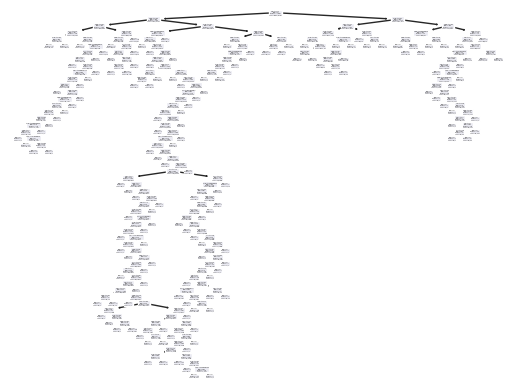

In [306]:
clf = tree.DecisionTreeClassifier()
clf_ros = clf.fit(x_train_ros, y_train_ros)
tree.plot_tree(clf_ros)

Text(0.5, 1.0, 'Decision Tree model_over Feature Importance')

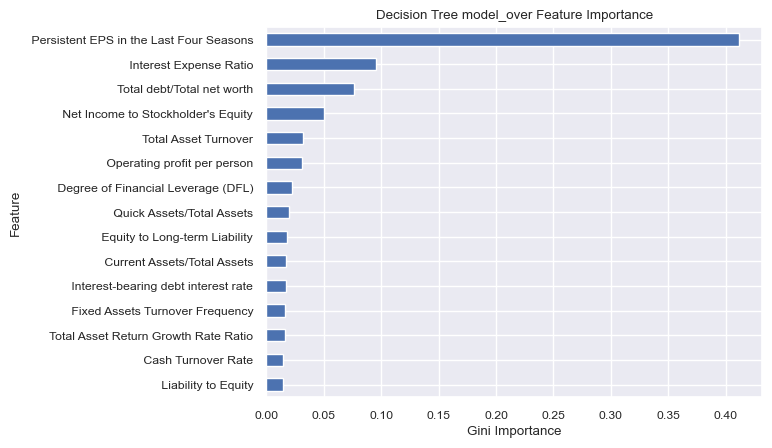

In [307]:
importances = clf_ros.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Decision Tree model_over Feature Importance")

### Decision Tree Model Evaluation

In [308]:
y_pred= clf_ros.predict(x_test_ros) 
print(clf_ros)
print(accuracy_score(y_test_ros, y_pred))

DecisionTreeClassifier()
0.6375095492742552


In [309]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1280,   29],
       [ 920,  389]], dtype=int64)

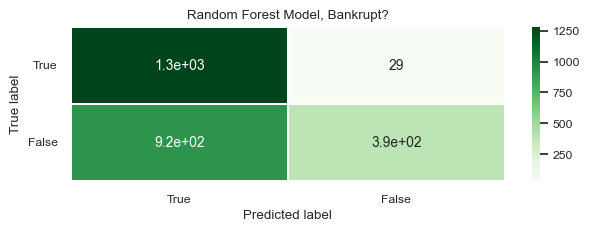

In [310]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [311]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.98      0.73      1309
           1       0.93      0.30      0.45      1309

    accuracy                           0.64      2618
   macro avg       0.76      0.64      0.59      2618
weighted avg       0.76      0.64      0.59      2618



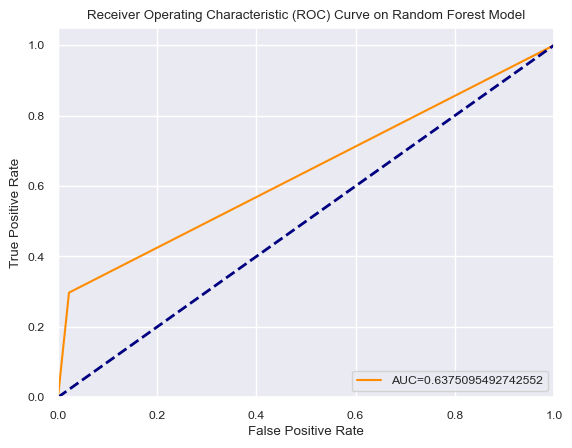

In [312]:
fpr, tpr, _ = mt.roc_curve(y_test_ros,  y_pred)
auc = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### From the Features Importances Random Forest and Decision Tree Algorithm 

### Fitur - fitur yang paling berpengaruh dalam bangkrut atau tidak-nya bank adalah sebagai berikut

### 1x Fitur yang pertama adalah fitur Net Income To Total Assets

Text(0.5, 1.0, 'Relationship between bankrupt events and Net income to total assets')

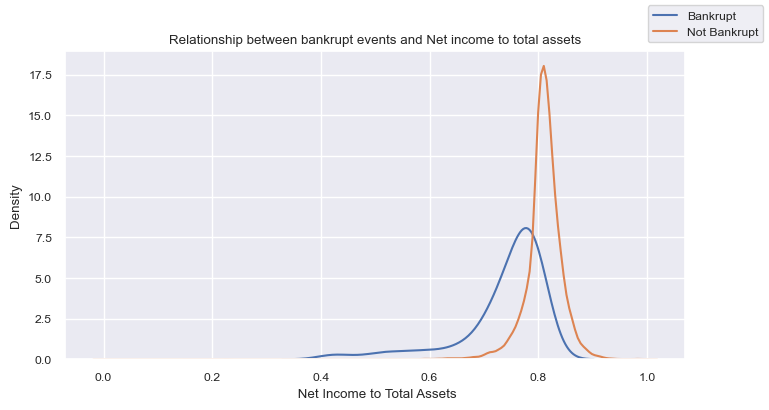

In [313]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Net Income to Total Assets'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Net Income to Total Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Net income to total assets')

### 2x. Fitur yang ke-dua adalah fitur Equity to Liability

Text(0.5, 1.0, 'Relationship between bankrupt events and Equity to Liability')

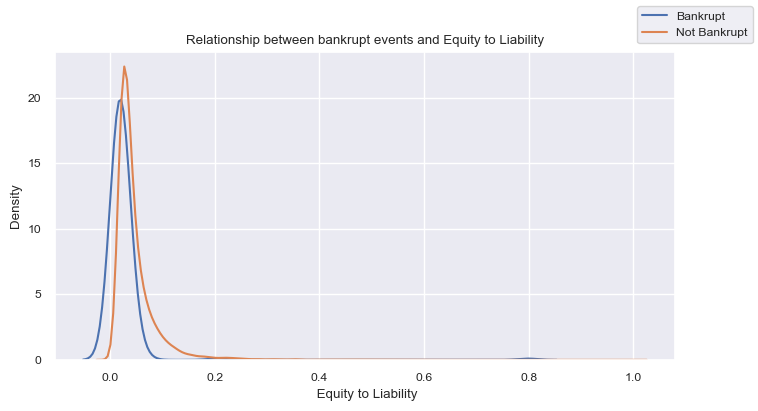

In [314]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Equity to Liability'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Equity to Liability'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Equity to Liability')

### 3x. Fitur yang ke-tiga adalah fitur Continuous interest rate (after tax)

Text(0.5, 1.0, 'Relationship between bankrupt events and Continuous interest rate after tax')

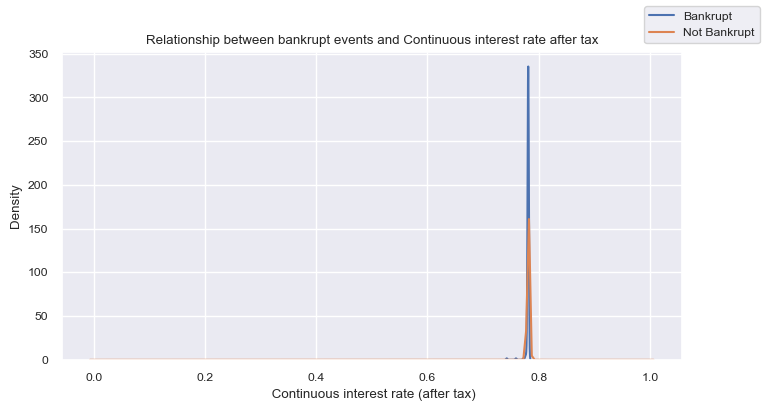

In [315]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Continuous interest rate (after tax)'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Continuous interest rate (after tax)'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Continuous interest rate after tax')

### 4x. Fitur yang ke empat adalah fitur Total debt/Total net worth

Text(0.5, 1.0, 'Relationship between bankrupt events and Total Debt/Total Net worth')

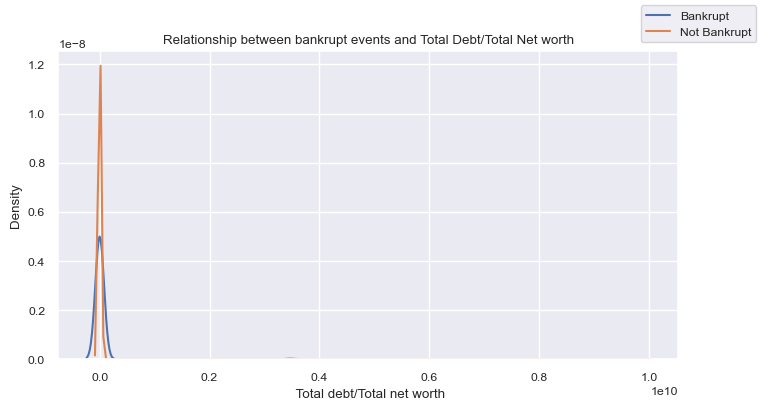

In [316]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Total debt/Total net worth'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Total debt/Total net worth'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Total Debt/Total Net worth')

### 5x. Fitur yang ke-lima adalah Debt Ratio

Text(0.5, 1.0, 'Relationship between bankrupt events and Debt Ratio')

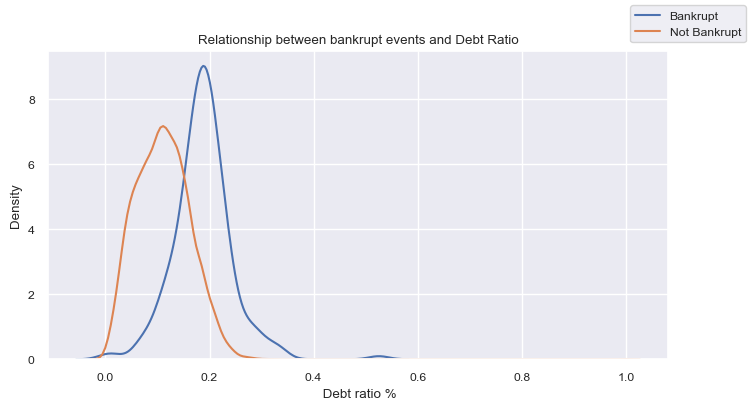

In [317]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Debt ratio %'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Debt ratio %'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Debt Ratio')

### B(c). Support Vectore Machine (SVM) Algorithm

#### Used Support Vectore Classifier

In [318]:
svmC = svm.SVC()
svm_ros = svmC.fit(x_train_ros, y_train_ros)

In [319]:
y_pred= svm_ros.predict(x_test_ros) 
print(svm_ros)
print(accuracy_score(y_test_ros, y_pred))

SVC()
0.6493506493506493


### Support Vector Machine Classifier Model Evaluation

In [320]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[926, 383],
       [535, 774]], dtype=int64)

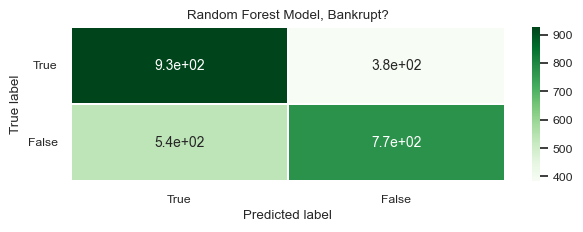

In [321]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

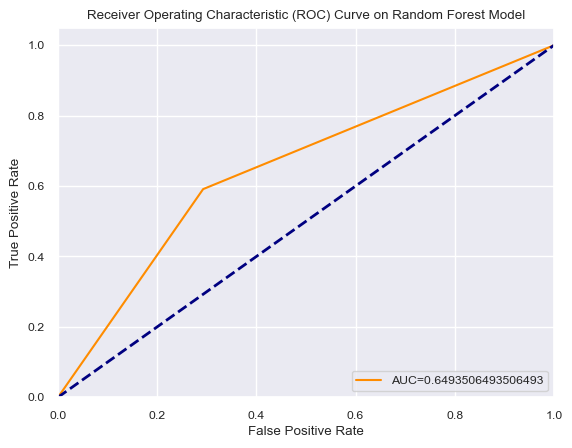

In [325]:
fpr, tpr, _ = mt.roc_curve(y_test_ros,  y_pred)
auc = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

#### Used Support Vector Regression

In [326]:
svmR = svm.SVR()
svm_ros = svmR.fit(x_train_ros, y_train_ros)

In [327]:
y_pred= svm_ros.predict(x_test_ros) 
print(svm_ros)
print('Regression Max Error: {0}'.format(mt.max_error(y_test_ros, y_pred)))
print('Mean Squared Error (MSE): {0}'.format(mt.mean_squared_error(y_test_ros, y_pred)))
print('Mean Absolute Error (MAE): {0}'.format(mt.mean_absolute_error(y_test_ros, y_pred)))

SVR()
Regression Max Error: 1.3496677221500586
Mean Squared Error (MSE): 0.24554588750390943
Mean Absolute Error (MAE): 0.39706570045846046


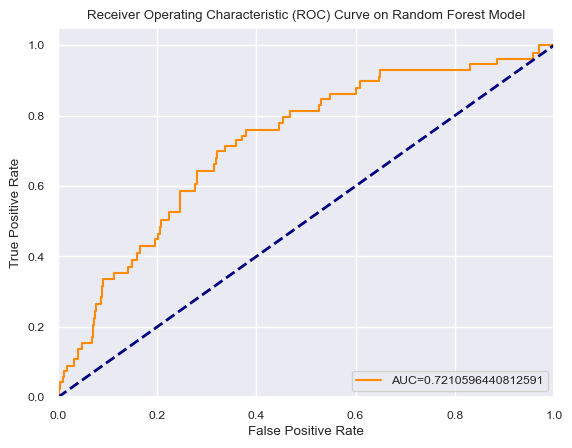

In [329]:
fpr, tpr, _ = mt.roc_curve(y_test_ros,  y_pred)
auc = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### B(d). Artificial Neural Network (ANN) Algorithm

In [370]:
# Initialize ANN 
ann = tf.keras.models.Sequential()

# Add the input layer and the first hidden layer
## 1. units:- number of neurons that will be present in the respective layer
## 2. activation:- specify which activation function to be used
ann.add(tf.keras.layers.Dense(units=72,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=72,activation="relu"))

#Adding Output Layer
## Because This is a binary classification (output either 0 or 1) than I only need 1 neuron
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
## 1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent.
## 2. loss:- specifies which loss function should be used.
## 3. metrics:- which performance metrics to be used in order to compute performance.
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

# Fitting ANN to build a model from splitting datasetset
## 3.batch_size: how many observations should be there in the batch
## 4. epochs: How many times neural networks will be trained.
ann_ros = ann.fit(x_train_ros, y_train_ros,batch_size=52,epochs = 100)

Epoch 1/100
204/204 [==============================] - 0s 866us/step - loss: 30700026.0000 - accuracy: 0.6721
Epoch 2/100
204/204 [==============================] - 0s 902us/step - loss: 5999616.0000 - accuracy: 0.7745
Epoch 3/100
204/204 [==============================] - 0s 775us/step - loss: 4895468.0000 - accuracy: 0.8052
Epoch 4/100
204/204 [==============================] - 0s 959us/step - loss: 4356951.0000 - accuracy: 0.8184
Epoch 5/100
204/204 [==============================] - 0s 839us/step - loss: 3680257.2500 - accuracy: 0.8325
Epoch 6/100
204/204 [==============================] - 0s 835us/step - loss: 2802418.2500 - accuracy: 0.8461
Epoch 7/100
204/204 [==============================] - 0s 947us/step - loss: 4943437.5000 - accuracy: 0.8135
Epoch 8/100
204/204 [==============================] - 0s 1ms/step - loss: 3243484.0000 - accuracy: 0.8478
Epoch 9/100
204/204 [==============================] - 0s 801us/step - loss: 3811323.7500 - accuracy: 0.8390
Epoch 10/100
204/204

204/204 [==============================] - 0s 963us/step - loss: 310045.6250 - accuracy: 0.9245
Epoch 77/100
204/204 [==============================] - 0s 889us/step - loss: 409495.8125 - accuracy: 0.9170
Epoch 78/100
204/204 [==============================] - 0s 894us/step - loss: 233082.5312 - accuracy: 0.9341
Epoch 79/100
204/204 [==============================] - 0s 1ms/step - loss: 325680.7500 - accuracy: 0.9165
Epoch 80/100
204/204 [==============================] - 0s 875us/step - loss: 290291.9062 - accuracy: 0.9205
Epoch 81/100
204/204 [==============================] - 0s 934us/step - loss: 266798.6250 - accuracy: 0.9248
Epoch 82/100
204/204 [==============================] - 0s 863us/step - loss: 250810.8906 - accuracy: 0.9227
Epoch 83/100
204/204 [==============================] - 0s 965us/step - loss: 285089.3125 - accuracy: 0.9192
Epoch 84/100
204/204 [==============================] - 0s 887us/step - loss: 283436.5000 - accuracy: 0.9189
Epoch 85/100
204/204 [============

In [371]:
# evaluate the model
scores = ann.evaluate(x_train_ros, y_train_ros)

print('Test loss:', scores[0])
print("\n%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

331/331 [==============================] - 0s 628us/step - loss: 60396.6172 - accuracy: 0.9447
Test loss: 60396.6171875

accuracy: 94.47%


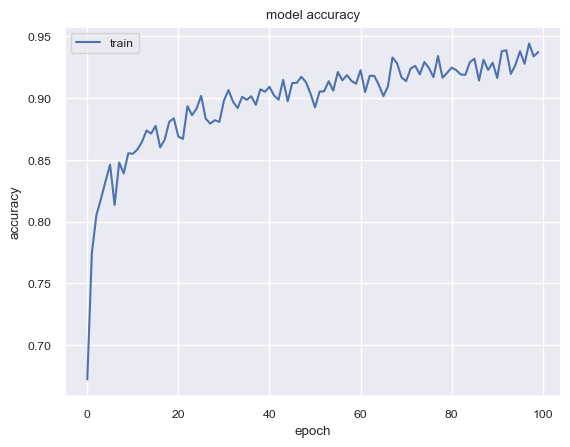

In [373]:
# summarize history for accuracy
plt.plot(ann_ros.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

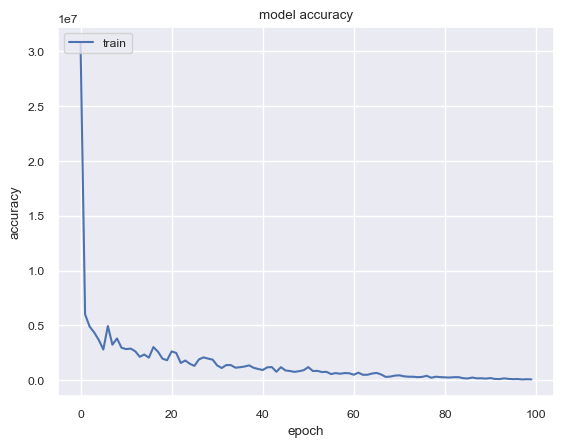

In [372]:
# summarize history for accuracy
plt.plot(ann_ros.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### C. With OVERSAMPLING method SMOTE

### C(a). Random Forest Algorithm

In [333]:
classifier= RandomForestClassifier(n_estimators = 80, criterion="entropy", max_features= 72, max_depth = None)  
classifier_sm= classifier.fit(x_train_sm, y_train_sm) 
classifier_sm

RandomForestClassifier(criterion='entropy', max_features=72, n_estimators=80)

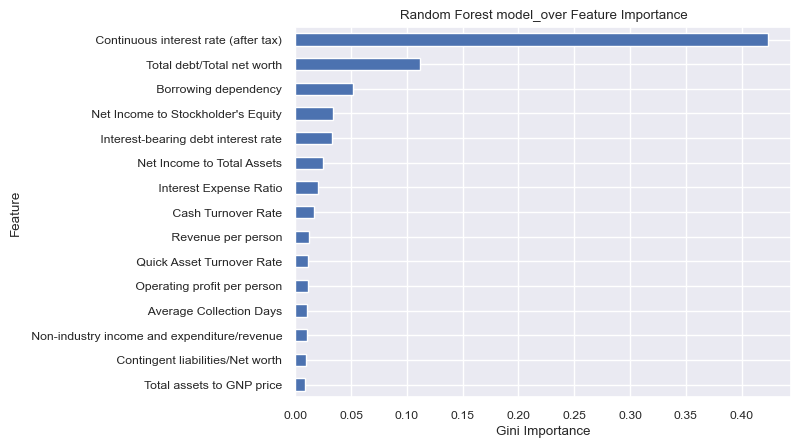

In [334]:
importances = classifier_sm.feature_importances_

feat_imp = pd.Series(importances, index=x_train_sm.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");

### Random Forest Model Evaluation

In [335]:
# Model Accuracy
y_pred= classifier_sm.predict(x_test_sm) 
print(classifier_sm)
print(accuracy_score(y_test_sm, y_pred))

RandomForestClassifier(criterion='entropy', max_features=72, n_estimators=80)
0.8766233766233766


In [336]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1253,   56],
       [ 267, 1042]], dtype=int64)

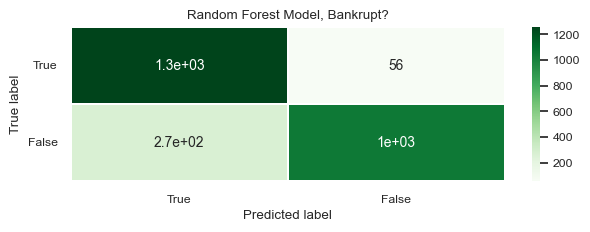

In [337]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [338]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1309
           1       0.95      0.80      0.87      1309

    accuracy                           0.88      2618
   macro avg       0.89      0.88      0.88      2618
weighted avg       0.89      0.88      0.88      2618



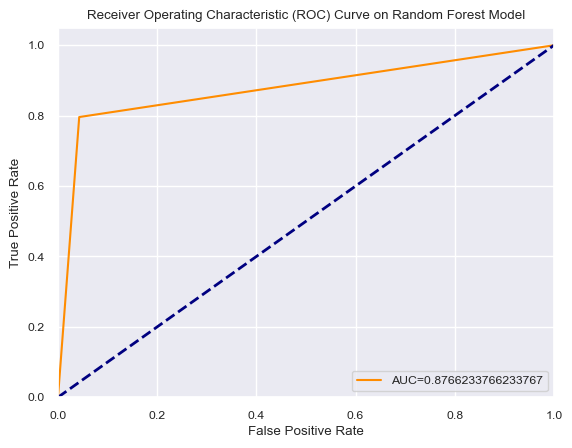

In [340]:
fpr, tpr, _ = mt.roc_curve(y_test_sm,  y_pred)
auc = mt.roc_auc_score(y_test_sm, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### C(b). Decision Tree Algorithm

[Text(0.4946981949081803, 0.9891304347826086, 'X[2] <= 0.782\ngini = 0.5\nsamples = 10580\nvalue = [5290, 5290]'),
 Text(0.21263303422370616, 0.967391304347826, 'X[20] <= 0.01\ngini = 0.297\nsamples = 5885\nvalue = [1066, 4819]'),
 Text(0.10893155258764607, 0.9456521739130435, 'X[66] <= 0.837\ngini = 0.489\nsamples = 1308\nvalue = [753, 555]'),
 Text(0.05008347245409015, 0.9239130434782609, 'X[11] <= 0.848\ngini = 0.394\nsamples = 571\nvalue = [154, 417]'),
 Text(0.0333889816360601, 0.9021739130434783, 'X[64] <= 0.01\ngini = 0.475\nsamples = 108\nvalue = [66, 42]'),
 Text(0.02003338898163606, 0.8804347826086957, 'X[20] <= 0.007\ngini = 0.287\nsamples = 75\nvalue = [62, 13]'),
 Text(0.01335559265442404, 0.8586956521739131, 'gini = 0.0\nsamples = 44\nvalue = [44, 0]'),
 Text(0.02671118530884808, 0.8586956521739131, 'X[70] <= 0.028\ngini = 0.487\nsamples = 31\nvalue = [18, 13]'),
 Text(0.02003338898163606, 0.8369565217391305, 'X[67] <= 0.282\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),

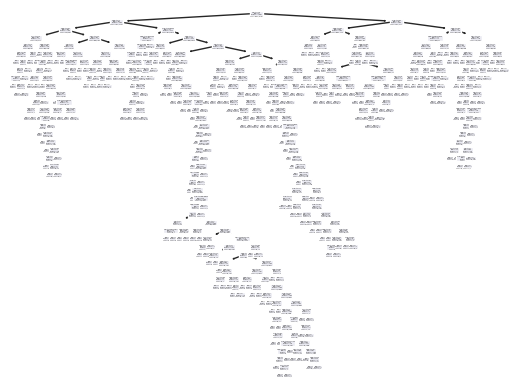

In [341]:
clf = tree.DecisionTreeClassifier()
clf_sm = clf.fit(x_train_sm, y_train_sm)
tree.plot_tree(clf_sm)

Text(0.5, 1.0, 'Decision Tree model_over Feature Importance')

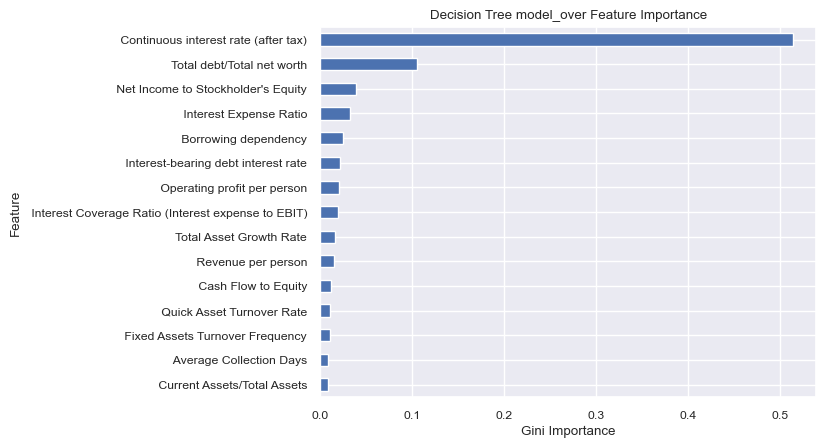

In [342]:
importances = clf_sm.feature_importances_

feat_imp = pd.Series(importances, index=x_train_sm.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Decision Tree model_over Feature Importance")

### Decision Tree Model Evaluation

In [343]:
y_pred= clf_ros.predict(x_test_sm) 
print(clf_sm)
print(accuracy_score(y_test_sm, y_pred))

DecisionTreeClassifier()
0.6562261268143621


In [344]:
matrix = confusion_matrix(y_test_sm, y_pred)  
matrix

array([[1280,   29],
       [ 871,  438]], dtype=int64)

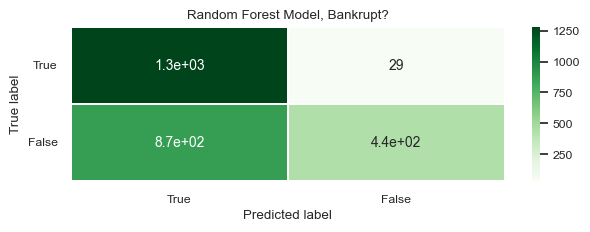

In [345]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [346]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.98      0.74      1309
           1       0.94      0.33      0.49      1309

    accuracy                           0.66      2618
   macro avg       0.77      0.66      0.62      2618
weighted avg       0.77      0.66      0.62      2618



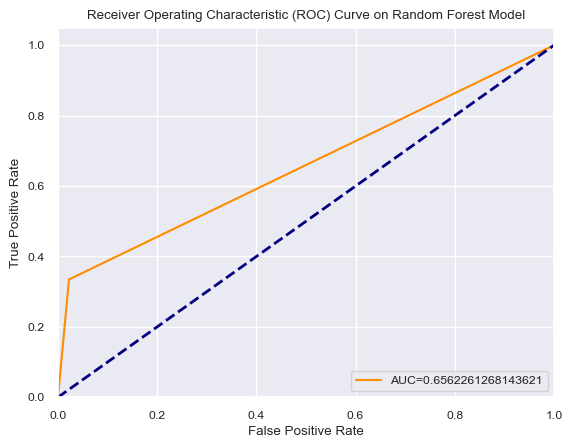

In [348]:
fpr, tpr, _ = mt.roc_curve(y_test_sm,  y_pred)
auc = mt.roc_auc_score(y_test_sm, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### C(c). Support Vectore Machine (SVM) Algorithm

#### Used Support Vectore Classifier

In [349]:
svmC = svm.SVC()
svm_sm = svmC.fit(x_train_sm, y_train_sm)

In [350]:
y_pred= svm_sm.predict(x_test_sm) 
print(svm_sm)
print(accuracy_score(y_test_sm, y_pred))

SVC()
0.7142857142857143


### Support Vector Machine Classifier Model Evaluation

In [351]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[995, 314],
       [434, 875]], dtype=int64)

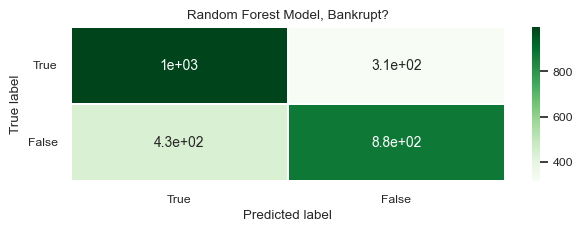

In [352]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

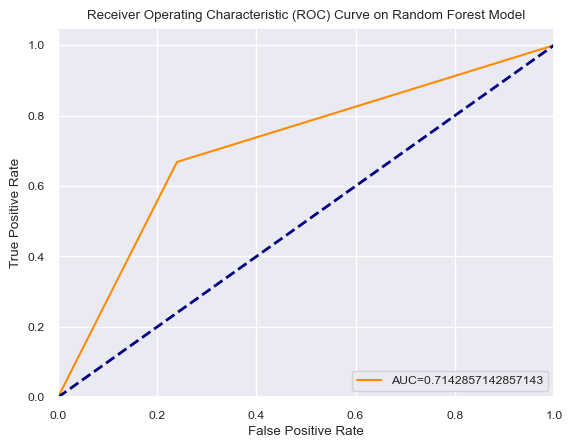

In [354]:
fpr, tpr, _ = mt.roc_curve(y_test_sm,  y_pred)
auc = mt.roc_auc_score(y_test_sm, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### C(d). Artificial Neural Network Algorithm

In [387]:
# Initialize ANN 
ann = tf.keras.models.Sequential()

# Add the input layer and the first hidden layer
## 1. units:- number of neurons that will be present in the respective layer
## 2. activation:- specify which activation function to be used
ann.add(tf.keras.layers.Dense(units=72,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=72,activation="relu"))

#Adding Output Layer
## Because This is a binary classification (output either 0 or 1) than I only need 1 neuron
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
## 1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent.
## 2. loss:- specifies which loss function should be used.
## 3. metrics:- which performance metrics to be used in order to compute performance.
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

# Fitting ANN to build a model from splitting datasetset
## 3.batch_size: how many observations should be there in the batch
## 4. epochs: How many times neural networks will be trained.
ann_ros = ann.fit(x_train_sm, y_train_sm,batch_size=82,epochs = 100)

Epoch 1/100
130/130 [==============================] - 0s 797us/step - loss: 34057660.0000 - accuracy: 0.6578
Epoch 2/100
130/130 [==============================] - 0s 776us/step - loss: 11545375.0000 - accuracy: 0.7250
Epoch 3/100
130/130 [==============================] - 0s 940us/step - loss: 7430812.0000 - accuracy: 0.7681
Epoch 4/100
130/130 [==============================] - 0s 1ms/step - loss: 4654487.5000 - accuracy: 0.7975
Epoch 5/100
130/130 [==============================] - 0s 963us/step - loss: 5476114.0000 - accuracy: 0.8013
Epoch 6/100
130/130 [==============================] - 0s 994us/step - loss: 10592540.0000 - accuracy: 0.7681
Epoch 7/100
130/130 [==============================] - 0s 1ms/step - loss: 4790760.5000 - accuracy: 0.8097
Epoch 8/100
130/130 [==============================] - 0s 1ms/step - loss: 6652594.5000 - accuracy: 0.7988
Epoch 9/100
130/130 [==============================] - 0s 910us/step - loss: 3352795.0000 - accuracy: 0.8346
Epoch 10/100
130/130 [

130/130 [==============================] - 0s 1ms/step - loss: 430002.0312 - accuracy: 0.9016
Epoch 77/100
130/130 [==============================] - 0s 947us/step - loss: 489502.4375 - accuracy: 0.8966
Epoch 78/100
130/130 [==============================] - 0s 1ms/step - loss: 901150.8750 - accuracy: 0.8650
Epoch 79/100
130/130 [==============================] - 0s 932us/step - loss: 560354.0625 - accuracy: 0.8866
Epoch 80/100
130/130 [==============================] - 0s 1ms/step - loss: 500475.4062 - accuracy: 0.8941
Epoch 81/100
130/130 [==============================] - 0s 895us/step - loss: 452686.8438 - accuracy: 0.8971
Epoch 82/100
130/130 [==============================] - 0s 986us/step - loss: 405022.8125 - accuracy: 0.8971
Epoch 83/100
130/130 [==============================] - 0s 978us/step - loss: 366030.2500 - accuracy: 0.9050
Epoch 84/100
130/130 [==============================] - 0s 939us/step - loss: 1228634.0000 - accuracy: 0.8524
Epoch 85/100
130/130 [===============

In [395]:
# evaluate the model
scores = ann.evaluate(x_train_sm, y_train_sm)

print('\nTest loss:', scores[0])
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

331/331 [==============================] - 0s 699us/step - loss: 187361.9531 - accuracy: 0.9048

Test loss: 187361.953125
accuracy: 90.48%


In [396]:
ann_ros.history.keys()

dict_keys(['loss', 'accuracy'])

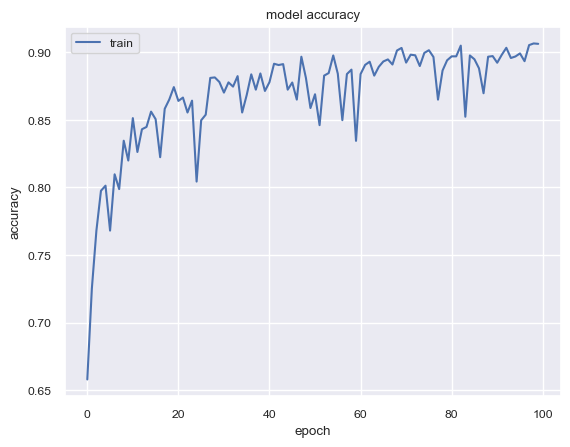

In [397]:
# summarize history for accuracy
plt.plot(ann_ros.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

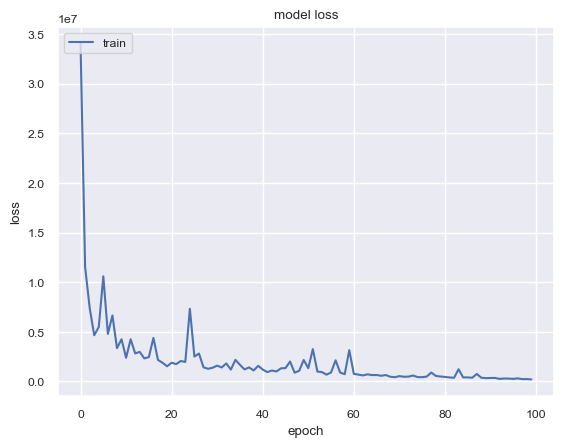

In [398]:
# summarize history for loss
plt.plot(ann_ros.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()